*Alper Uğurcan*<br>

<h1 align="center">NLP Project Final Project</h1>

# Introduction #
**Problem Statement**: Classifying Amazon reviews based on customer ratings using NLP

<h4 align="center">Impact</h4>

Reviews provide objective feedback to a product and are therefore inherently useful for consumers. These ratings are often summarized by a numerical rating, or the number of stars. Of course there is more value in the actual text itself than the quantified stars. And at times, the given rating does not truly convey the experience of the product – the heart of the feedback is actually in the text itself. The goal therefore is to build a classifier that would understand the essence of a piece of review and assign it the most appropriate rating based on the meaning of the text.

<h4 align="center">Background</h4>

Though product ratings on Amazon are aggregated from all the reviews by every customer, each individual rating is actually only an integer that ranges from one star to five stars. This reduces our predictions to discrete classes totaling five possibilities. Therefore what we'll have is a supervised, multi-class classifier with the actual review text as the core predictor.

This study is an exploration of Natural Language Processing (NLP). The goal of predicting the star rating given a piece of text will take on different NLP topics including word embedding, topic modeling, and dimension reduction. From there, we'll arrive at a final dataframe and we'll be employing different machine learning techniques in order to come up with the best approach (i.e. most accurate estimator) for our classifier.

<h4 align="center" id="Datasets">Datasets</h4>

The [Amazon dataset](http://jmcauley.ucsd.edu/data/amazon/index.html) contains the customer reviews for all listed *Electronics* products spanning from May 1996 up to July 2014. There are a total of 1,689,188 reviews by a total of 192,403 customers on 63,001 unique products. The data dictionary is as follows:

*  **asin** - Unique ID of the product being reviewed, *string*
*  **helpful** - A list with two elements: the number of users that voted *helpful*, and the total number of users that voted on the review (including the *not helpful* votes), *list*
*  **overall** - The reviewer's rating of the product, *int64*
*  **reviewText** - The review text itself, *string*
*  **reviewerID** - Unique ID of the reviewer, *string*
*  **reviewerName** - Specified name of the reviewer, *string*
*  **summary** - Headline summary of the review, *string*
*  **unixReviewTime** - Unix Time of when the review was posted, *string*

# Data Wrangling #

***Warning kapatma***

In [2]:
import warnings # Uyarıları içer aktarır

warnings.simplefilter("ignore", UserWarning) # Türüne göre uyarıları kapatma kodları
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

The `df` is created from the Amazon dataset. If the file has been downloaded then the dataset is loaded from the local file. Otherwise the file is accessed and extracted directly from the repository.

In [3]:
import os  # 'os' modülü dosya ve dizin işlemleri yapmak için kullanılır.
import pandas as pd  # 'pandas' modülü, veri işleme ve analiz için kullanılır.

dataset = "Electronics_5.json"  # Kullanılacak veri dosyasının adı ve yolunu belirler.

# Dosyanın mevcut olup olmadığını kontrol eder
if os.path.isfile(dataset):
    # Eğer 'Electronics_5.json' dosyası mevcutsa, bu dosyayı satır satır okuyarak bir pandas DataFrame'e yükler.
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    # Eğer dosya yoksa, veriyi internetten gzip formatında bir bağlantıdan indirip okur.
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    # Gzip ile sıkıştırılmış veriyi okur ve pandas DataFrame'e yükler.
    df = pd.read_json(url, compression='gzip', lines=True)

# İlk 10 satırı ekrana getirir. DataFrame'in ilk 10 gözlemini görmek için kullanılır.
display(df.head(10))

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


In [4]:
df.to_csv("amazon.csv")  # DataFrame'deki verileri "amazon.csv" adlı bir CSV dosyasına kaydeder.

In [6]:
from google.colab import files  # Google Colab'da dosya yükleme ve indirme işlemleri için kullanılan modülü içe aktarır.

files.download("amazon.csv")  # "amazon.csv" dosyasını kullanıcının bilgisayarına indirmeye başlar.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Only the `overall` and the `unixReviewTime` series are stored as integers. The rest are interpreted as strings (objects).

***EDA***

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewerID      1689188 non-null  object
 1   asin            1689188 non-null  object
 2   reviewerName    1664458 non-null  object
 3   helpful         1689188 non-null  object
 4   reviewText      1689188 non-null  object
 5   overall         1689188 non-null  int64 
 6   summary         1689188 non-null  object
 7   unixReviewTime  1689188 non-null  int64 
 8   reviewTime      1689188 non-null  object
dtypes: int64(2), object(7)
memory usage: 116.0+ MB
None


The `unixReviewTime` is converted from Unix time to the more intuitive `datetime` datatype.

In [6]:
#df.to_csv('amazon.csv') Already saved

In [7]:
!ls -al # Dizindeki dosyaları ayrıntılı gösterme

total 1234540
drwxr-xr-x 1 root root       4096 Sep 13 20:25 .
drwxr-xr-x 1 root root       4096 Sep 13 20:21 ..
-rw-r--r-- 1 root root 1264147732 Sep 13 20:26 amazon.csv
drwxr-xr-x 4 root root       4096 Sep 12 13:22 .config
drwxr-xr-x 1 root root       4096 Sep 12 13:22 sample_data


In [8]:
# Unix Zaman Damgası 1970-01-01 00:00:00 UTC'den itibaren geçen saniyeleri temsil eder. Daha rahat analiz yapabilmek için datetime modülüne çevirdik
from datetime import datetime  # 'datetime' modülü, tarih ve saat işlemleri yapmak için kullanılır.

# 'condition' isimli bir lambda fonksiyonu tanımlar. Bu fonksiyon, bir Unix zaman damgasını tarih formatına dönüştürür.
condition = lambda row: datetime.fromtimestamp(row).strftime("%m-%d-%Y")

# 'df' DataFrame'inde 'unixReviewTime' sütunundaki her bir Unix zaman damgasını, 'condition' fonksiyonunu kullanarak tarih formatına dönüştürür.
df["unixReviewTime"] = df["unixReviewTime"].apply(condition)

The `reviewTime` is dropped since the `unixReviewTime` series more accurately describes the time when each review was posted.

In [9]:
df.drop(labels="reviewTime", axis=1, inplace=True) # ReviewTime zaten varmış ama biraz karışık

display(df.head())

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,06-02-2013
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,11-25-2010
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,09-09-2010
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",11-24-2010
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",09-29-2011


Each review is stored as string in the `reviewText` series. A sample product review is below:

In [10]:
print(df["reviewText"].iloc[0]) # ReviewText içindeki ilk satırı yazdırır

We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!


Each review is associated with a rating stored under the `overall` field. This serves as the quantified summary of a given review and will thus be used as the ground truth labels for the model.

In [11]:
print(df.overall.unique()) # Ürün puanı içindeki eşsiz değerleri yazdırır

[5 1 3 2 4]


## NLP Pre-Processing ##
We'll work with `reviewText` to prepare our model's final dataframe. The goal is to produce tokens for every document (i.e. every review). These documents will make up our corpora where we'll draw our vocabulary from.

The following is a sample text in its original form.

In [12]:
sample_review = df["reviewText"].iloc[1689185] # Rastgele örnek aldık
print(sample_review) # Gösterdik

I&#8217;m a big fan of the Brainwavz S1 (actually all of their headphones &#8211; have yet to be disappointed with any of their products). The S1 has been my main set for active use (e.g., workouts, runs, etc.) since the flat cable is very durable and resistant to tangles. The S5 keeps all the good features of the S1 and adds to it &#8211; the sound quality is richer and better defined.That&#8217;s not to say the S1 sounds poor &#8211; they are quite good, in fact. But the S5 are better. The highs are better defined and the midrange has more punch to it. The bass comes through clearly without moving into the harsh territory when the volume is pushed (as the S1s can do). The overall sound quality is very pleasing.The build quality seems solid &#8211; as solid as the S1 or better. I love the flat cable! I know that&#8217;s something that is not appreciated by everyone, but for me it&#8217;s been working out wonderfully. Although this (as most other Brainwavz headsets) comes with an excel

In [15]:
df=df.sample(5000) # Data çok büyük olduğu için içinden sadece 5000 tane rastgele örnek aldık, 400000 alınca colab disconnect ediyor.

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
1435784,AMWR5ND0LTXEY,B00908BQCY,David Bailey,"[2, 2]","OK, so thats not so surprising when you consid...",5,This camera has a split personality..Really!,04-26-2013
99627,A2LWQLV37ZEP7P,B00023C6SE,David Y,"[1, 1]","I bought these to replace my Logitech G930, be...",4,Good for my Computer,04-06-2011
1677741,A2FA4YPT4M4TBV,B00HK0E0A4,"Alexander Smith ""Chief Button Pusher""","[0, 0]",This unit has much less of an amplifier than m...,4,Great value and good sound quality.,04-23-2014
190267,A31NLD3NMN4MZ,B000E6NGBU,Terri Ann,"[0, 0]",I am a drive killer - sometimes an operating s...,5,Everyone who knows how to swap out a drive nee...,06-14-2010
1395150,AGKUAO9LYVRWS,B008GN0OWM,steven,"[0, 0]",piece of crap it fits it fine but the rubber p...,1,RUBBER RIPS EASY!!,07-30-2013


In [16]:
df = df.reset_index(drop=True) # index resetledik

In [17]:
df_backup = df.copy()  # 'df' veri çerçevesinin bir yedeğini oluşturur ve 'df_backup' değişkenine atar

In [19]:
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
4995,A2GD5BP8VKPE22,B000089GN3,"S. Thompson ""Biophilic""","[0, 0]",I'm old enough to remember when Sennhiser firs...,4,Headphones of Mystery,02-27-2010
4996,A2PTVQZVMOW3P0,B00931DHKM,blacksheepsigns,"[1, 1]",I wanted a stylus that resembles a pen as much...,4,Best Fin Point Stylus I have found.,08-26-2013
4997,A23OZY3CN75EZS,B00974WOAO,"Shing Shing T. Pua ""STPua""","[0, 2]",It's too EarLy to Comment on this One for the ...,3,It's too EarLy to Comment on this One for the ...,06-17-2014
4998,A2F7ALOY4MEIQ8,B0011Z44UA,grn4jd,"[3, 3]",I bought this camera to take on a long trip la...,5,Just an outstanding camera when you don't want...,04-06-2009
4999,A21JN1E7OMPOQM,B003U8HYIA,"Denis A. ""child of 90's""","[0, 0]",Bought this one to replace the original batter...,5,Great replacement,03-31-2012


### HTML Entities ###
Some special characters like the apostrophe (’) and the en dash (–) are expressed as a set of numbers prefixed by `&#` and suffixed by `;`. This is because the dataset was scraped from an HTML parser, and the dataset itself includes data that predated the universal UTF-8 standard.

These *HTML Entities* can be decoded by importing the `html` library.

In [20]:
import html  # HTML import eder

decoded_review = html.unescape(sample_review)  # 'sample_review' değişkenindeki HTML karakterlerini çözerek düz metin haline getirir
print(decoded_review)  # Çözülmüş metni ekrana yazdırır

I’m a big fan of the Brainwavz S1 (actually all of their headphones – have yet to be disappointed with any of their products). The S1 has been my main set for active use (e.g., workouts, runs, etc.) since the flat cable is very durable and resistant to tangles. The S5 keeps all the good features of the S1 and adds to it – the sound quality is richer and better defined.That’s not to say the S1 sounds poor – they are quite good, in fact. But the S5 are better. The highs are better defined and the midrange has more punch to it. The bass comes through clearly without moving into the harsh territory when the volume is pushed (as the S1s can do). The overall sound quality is very pleasing.The build quality seems solid – as solid as the S1 or better. I love the flat cable! I know that’s something that is not appreciated by everyone, but for me it’s been working out wonderfully. Although this (as most other Brainwavz headsets) comes with an excellent hard shell case, I usually tote my earbuds 

In [34]:
#sample review 5k data aldığımız için gitti yeni örnek yapalım:

sample_review = df["reviewText"].iloc[4725]
print(sample_review) # Gösterdik
print("------")
decoded_review = html.unescape(sample_review)  # 'sample_review' değişkenindeki HTML karakterlerini çözerek düz metin haline getirir
print(decoded_review)  # Çözülmüş metni ekrana yazdırır

I like the fact that it is small...doesn't take up my cup holder space, since the outlet is right behind the cup holders.  This is flush with the outlet, so it is perfect for my Toyota Rav4!
------
I like the fact that it is small...doesn't take up my cup holder space, since the outlet is right behind the cup holders.  This is flush with the outlet, so it is perfect for my Toyota Rav4!


Since punctuation marks do not add value in the way we'll perform NLP, all the HTML entities in the review texts can be dropped. The output series `preprocessed` is our `reviewText` but without the special characters.

In [35]:
pattern = r"\&\#[0-9]+\;"  # HTML karakter referanslarını (örneğin, &#123;) tanımlayan düzenli ifade deseni
# r" - Ham dize (raw string) belirtir, böylece ters eğik çizgi (\) karakteri kaçış karakteri olarak değerlendirilmez.
# \& - '&' karakterini ifade eder.
# \# - '#' karakterini ifade eder.
# [0-9]+ - Bir veya daha fazla rakamı ifade eder.
# \; - ';' karakterini ifade eder.
# Bu desen, HTML'de özel karakterlerin sayısal referanslarını bulmak için kullanılır.

df["preprocessed"] = df["reviewText"].str.replace(pat=pattern, repl="", regex=True)
# 'reviewText' sütunundaki HTML karakter referanslarını (yukarıda tanımlandığı gibi) bulur ve bunları boş bir string ile değiştirir.
# 'regex=True' ifadesi, 'pattern' düzenli ifade olarak değerlendirilmesini sağlar.
# Sonuç, 'preprocessed' adlı yeni bir sütuna kaydedilir.

print(df["preprocessed"].iloc[4725])

I like the fact that it is small...doesn't take up my cup holder space, since the outlet is right behind the cup holders.  This is flush with the outlet, so it is perfect for my Toyota Rav4!


### Extracting the root word ###
How often a word is used is key information in natural language processing. It is therefore important to reduce words to their root form. An example would be the usage of the word "*learn*". If we differentiate this base form from a modified version like "*learning*" then we might lose relational context between two documents that have used either word.

We'll be using Lemmatization to reduce tokens to their base word. This technique takes into account context similarity according to part-of-speech anatomy. Stemming is another common approach, although stemming only performs truncation and would not be able to reduce "*taught*" to "*teach*".

We will be using the *WordNetLemmatizer* from the Natural Language Toolkit (or *NLTK*). Lemmatization only applies to each word but it is dependent on sentence structure to understand context. We therefore need to have part-of-speech tags associated with each word. Our output is derived from applying the `lemmatize_doc` function to our `preprocessed` column.

The `lemmatize_doc` works as follows:
* Each review is broken down into a list of sentences
* Punctuations that only group words or separate sentences (hyphens therefore are excluded) are removed (replaced by whitespace) using RegEx
* Every sentence is further broken down into words (tokens)

Each of the sentences then becomes an ordered bag of words. Every word is then *tagged* to a part-of-speech. This word-tag tuple pair is then fed one at a time to the `lemmatize_word` function, which works as follows:
* Only modifiable words – nouns, verbs, adjectives, and adverbs – can be reduced to roots
* These words are lemmatized and appended to the `root` list
* Words that are not modifiable are added as they are to the `root` list

The output lists are linked together as a string using whitespace. In the end, each `preprocessed` review will retain its text form but with each word simplified as much as possible.

In [36]:
%%time
import re  # Düzenli ifadelerle metin işleme için gerekli kütüphane
import nltk  # Doğal dil işleme kütüphanesi

from nltk import word_tokenize, pos_tag  # NLTK'dan kelime tokenizasyonu ve POS (Part of Speech) etiketleme fonksiyonları
from nltk.stem import WordNetLemmatizer  # NLTK'dan lemmatizasyon için gerekli sınıf
from nltk.tokenize import sent_tokenize  # NLTK'dan cümle tokenizasyonu fonksiyonu
from nltk.corpus import wordnet  # NLTK'dan WordNet veritabanı

# NLTK kaynaklarını indirir
resources = ["wordnet", "stopwords", "punkt", \
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]
# "wordnet" - Kelime anlam ilişkilerini tanımlayan veritabanı; lemmatizasyon için kullanılır.
# "stopwords" - Anlamsız yaygın kelimeler; genellikle NLP'de çıkarılır.
# "punkt" - Cümle ve kelime tokenizasyonu için model.
# "averaged_perceptron_tagger" - Kelime türlerini etiketlemek için model.
# "maxent_treebank_pos_tagger" - Başka bir POS etiketleme modeli.
for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)  # Kaynağın mevcut olup olmadığını kontrol eder
    except LookupError:
        nltk.download(resource)  # Kaynak mevcut değilse indirir

#create Lemmatizer object
lemma = WordNetLemmatizer()  # Lemmatizer nesnesi oluşturur

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]  # Kelimenin POS etiketi
        word = token[0]  # Kelime
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))  # Sıfat için lemmatizasyon
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))  # Fiil için lemmatizasyon
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))  # İsim için lemmatizasyon
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))  # Zarflar için lemmatizasyon
        else:
            root.append(word)  # Diğer durumlarda kelimeyi olduğu gibi ekler
    return root

def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)  # Cümleleri ayırır
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)  # Noktalama işaretlerini kaldırır
        tokenized_word = word_tokenize(no_punctuation)  # Kelimelere ayırır
        tagged_token = pos_tag(tokenized_word)  # Kelimeleri POS etiketleriyle etiketler
        lemmatized = lemmatize_word(tagged_token)  # Lemmatizasyon uygular
        lemmatized_list.extend(lemmatized)  # Lemmatize edilmiş kelimeleri listeye ekler
    return " ".join(lemmatized_list)  # Lemmatize edilmiş kelimeleri birleştirip döndürür

#apply our functions
df["preprocessed"] = df["preprocessed"].apply(lambda row: lemmatize_doc(row))
# 'preprocessed' sütunundaki her satıra 'lemmatize_doc' fonksiyonunu uygular ve sonucu 'preprocessed' sütununa kaydeder

print(df["preprocessed"].iloc[4725])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


I like the fact that it be small doesn t take up my cup holder space since the outlet be right behind the cup holder This be flush with the outlet so it be perfect for my Toyota Rav4
CPU times: user 53.4 s, sys: 636 ms, total: 54.1 s
Wall time: 1min 1s


### Removing Accents ###
Each review is normalized from longform UTF-8 to ASCII encoding. This will remove accents in characters and ensure that words like "*naïve*" will simply be interpreted as (and therefore not differentiated from) "*naive*".

In [37]:
from unicodedata import normalize  # Unicode karakter normalizasyonu için gerekli kütüphane

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
# 'remove_accent' fonksiyonu, metindeki aksan işaretlerini kaldırır.
# normalize("NFKD", text) - Unicode karakterleri Normal Form KD (Kompleks Decomposition) biçiminde ayrıştırır.
# encode("ascii", "ignore") - Ayrıştırılmış metni ASCII formatına çevirir, aksan işaretlerini yok sayar.
# decode("utf-8", "ignore") - ASCII formatındaki metni UTF-8 formatına çevirir.

df["preprocessed"] = df["preprocessed"].apply(remove_accent)
# 'preprocessed' sütunundaki her metin hücresine 'remove_accent' fonksiyonunu uygular,
# aksan işaretlerini kaldırır ve sonucu 'preprocessed' sütununa kaydeder.

print(df["preprocessed"].iloc[4725])

I like the fact that it be small doesn t take up my cup holder space since the outlet be right behind the cup holder This be flush with the outlet so it be perfect for my Toyota Rav4


### Removing Punctuations ###
The `preprocessed` reviews are further cleaned by dropping punctuations. Using regular expressions, only whitespaces and alphanumeric characters are kept.

In [38]:
pattern = r"[^\w\s]"
# 'pattern' düzenli ifadesi, alfasayısal karakterler ve boşluklar dışındaki tüm karakterleri eşleştirir.
# [^\w\s] - \w, alfasayısal karakterleri ve alt çizgileri, \s ise boşluk karakterlerini ifade eder.
# [^\w\s] bu karakterler dışındaki her şeyi temsil eder.

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)
# 'preprocessed' sütunundaki metinlerde, 'pattern' deseni tarafından eşleştirilen tüm karakterleri boşluk (" ") ile değiştirir.
# regex=True, düzenli ifadenin (regex) kullanılacağını belirtir.

print(df["preprocessed"].iloc[4725])  # 'preprocessed' sütunundaki 4725. satırın değerini ekrana yazdırır


I like the fact that it be small doesn t take up my cup holder space since the outlet be right behind the cup holder This be flush with the outlet so it be perfect for my Toyota Rav4


### Converting to Lower Case ###
Every letter is also converted to lower case. This makes it so that "*iPhone*" will not be distinguishable from "*iphone*".

In [39]:
df["preprocessed"] = df["preprocessed"].str.lower()
# 'preprocessed' sütunundaki tüm metinleri küçük harfe dönüştürür.
# str.lower(), metin içindeki büyük harfleri küçük harfe çevirir ve sonucu 'preprocessed' sütununa kaydeder.

print(df["preprocessed"].iloc[4725])  # 'preprocessed' sütunundaki 4725. satırın değerini ekrana yazdırır

i like the fact that it be small doesn t take up my cup holder space since the outlet be right behind the cup holder this be flush with the outlet so it be perfect for my toyota rav4


### Removing Stop Words ###
Stop words consist of the most commonly used words that include pronouns (e.g. *us*, *she*, *their*), articles (e.g. *the*), and prepositions (e.g. *under*, *from*, *off*). These words are not helpful in distinguishing a document from another and are therefore dropped.

Note that the `stop_words` were stripped of punctuations just as what we have done to our dataset.

In [40]:
from nltk.corpus import stopwords  # NLTK'dan durak kelimeleri (stop words) içeren modülü import eder

stop_words = stopwords.words("english")  # İngilizce durak kelimeleri listesini alır

stop_words = [word.replace("\'", "") for word in stop_words]
# Durak kelimeler listesindeki tek tırnak işaretlerini ('), boş bir string ile değiştirir.

print(f"sample stop words: {stop_words[:15]} \n")
# İlk 15 durak kelimesini ekrana yazdırır; bu, durak kelimeler listesinin örneklerini görmek için kullanılır.

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
# 'remove_stop_words' fonksiyonu, metindeki durak kelimelerini kaldırır.
# Her satırı boşluk karakterine göre böler, durak kelimelerini çıkarır ve geri kalan kelimeleri birleştirir.

df["preprocessed"] = df["preprocessed"].apply(remove_stop_words)
# 'preprocessed' sütunundaki her metin hücresine 'remove_stop_words' fonksiyonunu uygular,
# durak kelimelerini kaldırır ve sonucu 'preprocessed' sütununa kaydeder.

print(df["preprocessed"].iloc[4725])  # 'preprocessed' sütunundaki 4725. satırın değerini ekrana yazdırır

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 

like fact small take cup holder space since outlet right behind cup holder flush outlet perfect toyota rav4


### Removing Extra Spaces ###
Again, we make use of regular expressions to ensure we never get more than a single whitespace to separate words in our sentences.

In [41]:
pattern = r"[\s]+"
# 'pattern' düzenli ifadesi, bir veya daha fazla boşluk karakterini eşleştirir.
# [\s]+ - \s, boşluk karakterlerini (boşluk, tab, yeni satır vb.) ifade eder; + işareti bir veya daha fazlasını belirtir.

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)
# 'preprocessed' sütunundaki metinlerde, 'pattern' deseni tarafından eşleştirilen bir veya daha fazla boşluk karakterini tek bir boşluk karakteri (" ") ile değiştirir.
# regex=True, düzenli ifadenin (regex) kullanılacağını belirtir.

print(df["preprocessed"].iloc[4725])  # 'preprocessed' sütunundaki 4725. satırın değerini ekrana yazdırır


like fact small take cup holder space since outlet right behind cup holder flush outlet perfect toyota rav4


## Tokenization ##
The entries for the `preprocessed` column are extracted to make up our *corpora*, which is simply a collection of all our documents. Each review is then transformed into an ordered list of words. This is the process of *tokenization* – the document is broken down into individual words or tokens.

Our tokenized sample review is below:

In [42]:
corpora = df["preprocessed"].values
# 'preprocessed' sütunundaki verileri alır ve bir NumPy dizisine dönüştürür.
# Her bir eleman, işlenmiş metin satırını içerir.

tokenized = [corpus.split(" ") for corpus in corpora]
# 'corpora' içindeki her metin satırını boşluk karakterine göre böler ve kelimeleri listeye dönüştürür.
# Sonuç olarak, her metin satırı kelimelerden oluşan bir liste haline gelir.

print(tokenized[4725])

['like', 'fact', 'small', 'take', 'cup', 'holder', 'space', 'since', 'outlet', 'right', 'behind', 'cup', 'holder', 'flush', 'outlet', 'perfect', 'toyota', 'rav4']


## Phrase Modeling ##
Since order of words matter in most NLP models, it is often helpful to group neighboring words that appear to convey one meaning as though they are a single word, like *smart TV*.

To be considered a *phrase*, the number of times that two words should appear next to each other is set to at least `300`. The *threshold* then takes that minimum and compares it to the total number of token instances in the corpora. The higher the threshold, the more often two words must appear adjacent to be grouped into a phrase.

In [43]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)
# 'Phrases' sınıfını kullanarak bigram (iki kelimelik ifadeler) modelini oluşturur.
# 'tokenized' içindeki kelime listelerini analiz eder.
# min_count=300 - Bir bigramın en az 300 kez görünmesini bekler.
# threshold=50 - Bir bigramın eşik değerini belirler; bu değer altında kalırsa bigram oluşturulmaz.

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)
# Daha sonra bigramları dikkate alarak trigram (üç kelimelik ifadeler) modelini oluşturur.
# 'bi_gram[tokenized]' ifadesi, bigramları tanımlamak için daha önce oluşturulmuş bigram modelini uygular.
# min_count=300 - Bir trigramın en az 300 kez görünmesini bekler.
# threshold=50 - Bir trigramın eşik değerini belirler; bu değer altında kalırsa trigram oluşturulmaz.


### Unigrams ###
Unigrams are single pieces of tokens. The code below takes all the unique words from the entire corpora and prints a sample:

In [44]:
uni_gram_tokens = set([token for text in tokenized for token in text])
# 'tokenized' içindeki her metin satırında bulunan tüm kelimeleri (token'ları) alır ve bir küme (set) oluşturur.
# Küme, her kelimenin benzersiz olmasını sağlar.

uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))
# Boş string ('') içeren kelimeleri filtreler ve bunları kümeden çıkarır.
# 'filter' fonksiyonu, boş olmayan kelimeleri tutar; lambda x: x != "" ifadesi, boş olmayan kelimeleri seçer.

print(list(uni_gram_tokens)[:50])
# 'uni_gram_tokens' kümesini listeye dönüştürür ve ilk 50 kelimeyi ekrana yazdırır.
# Bu, kümedeki bazı örnek kelimeleri görmenizi sağlar.

['supervisor', 'thinner', 'yor', '6a', 'forty', 'def', '3yo', 'powerline', 'reliable', 'suv', 'joint', 'jill', 'submerge', 'ibm', 's4', 'qr', 'writing', 'ritzcamera', 'purchaser', 'tienen', '160lbs', 'cluttered', 'gorillapods', 'civic', 'zd101', 'unknown', 'gives', 'medialink', 'seaquarium', 'engine', 'populated', 'packed', '3013', 'prong', 'hidepth', '25w', 'doc', 'smiling', 'polymer', '797', 'unsuccessfully', 'jpg', 'portraits', 'mindframe', 'humpback', 'multiflash', '80gb', '830', '7301yb', 'dmark']


### Bigrams ###
Bigrams are generated from using the *gensim* phraser. Only those that pass the `bi_gram` criteria are considered.

The code below takes all the unique bigram phrases from the entire corpora:

In [48]:
bigram_min = bi_gram.min_count
# Bigram modelindeki minimum count değerini alır; bu, bigramların en az kaç kez görünmesi gerektiğini belirler.

bi_condition = lambda x: x[1] >= bigram_min
# 'bi_condition' fonksiyonu, bigramların sayısını kontrol eden bir koşuldur.
# Bu koşul, bigramın frekansının 'bigram_min' değerine eşit veya daha fazla olup olmadığını kontrol eder.

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
# 'bi_gram.vocab.items()' ifadesi, bigram modelindeki bigramları ve frekanslarını döndürür.
# 'filter' fonksiyonu, 'bi_condition' fonksiyonuna göre bigramları filtreler.
# Sonuç olarak, frekansı 'bigram_min' değerine eşit veya daha fazla olan bigramları içeren bir sözlük (dict) oluşturur.

bi_gram_tokens = set(bi_gram_tokens.keys())  # bi_gram_tokens sözlüğündeki anahtarları alır ve bunları benzersiz bir küme haline getirir.

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
# 'bi_grams_only', yalnızca bigram modelinde bulunan ancak unigram (tek kelimelik) modelinde bulunmayan bigramları içerir.
# 'difference' fonksiyonu, 'uni_gram_tokens' kümesinde bulunmayan bigramları bulur.

print(list(bi_grams_only)[:50])
# 'bi_grams_only' kümesini listeye dönüştürür ve ilk 50 bigramı ekrana yazdırır.
# Bu, unigramlarda bulunmayan bazı bigramları görmek için kullanılır.


['work_great', 'work_well']


### Trigrams ###
Trigrams are generated by applying another *gensim* phraser on top of a bigram phraser. Take for example the tokens *sd* and *card*. Because they appear often together enough, they become linked together as *sd_card*. In turn, if *sd_card* appears adjacent to the token *reader* in enough instances, then the `tri_gram` model would link them together as well to tokenize *sd_card_reader*.

The code below takes all the unique trigram phrases from the entire corpora:

In [50]:
trigram_min = tri_gram.min_count
# Trigram modelindeki minimum count değerini alır; bu, trigramların en az kaç kez görünmesi gerektiğini belirler.

tri_condition = lambda x: x[1] >= trigram_min
# 'tri_condition' fonksiyonu, trigramların sayısını kontrol eden bir koşuldur.
# Bu koşul, trigramın frekansının 'trigram_min' değerine eşit veya daha fazla olup olmadığını kontrol eder.

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
# 'tri_gram.vocab.items()' ifadesi, trigram modelindeki trigramları ve frekanslarını döndürür.
# 'filter' fonksiyonu, 'tri_condition' fonksiyonuna göre trigramları filtreler.
# Sonuç olarak, frekansı 'trigram_min' değerine eşit veya daha fazla olan trigramları içeren bir sözlük (dict) oluşturur.

tri_gram_tokens = set([token for token in tri_gram_tokens])
# Bu, trigramların benzersiz ve sıralı bir listesine sahip olmanızı sağlar.

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
# 'tri_grams_only', yalnızca trigram modelinde bulunan ancak bigram modelinde bulunmayan trigramları içerir.
# 'difference' fonksiyonu, 'bi_gram_tokens' kümesinde bulunmayan trigramları bulur.

print(list(tri_grams_only)[:50])
# 'tri_grams_only' kümesini listeye dönüştürür ve ilk 50 trigramı ekrana yazdı


[]


The `tri_gram` and `bi_gram` phrasers are applied to our `tokenized` corpora.

In [51]:
tokenized = [Phraser(tri_gram)[Phraser(bi_gram)[i]] for i in tokenized]
# Bu kod, tokenized listesindeki her metin satırına bigram ve trigram modelini uygular.
# 'Phraser(bi_gram)[i]' - Önce bigram modelini uygular ve metindeki bigramları oluşturur.
# 'Phraser(tri_gram)[Phraser(bi_gram)[i]]' - Daha sonra trigram modelini uygular ve bigramları içeren metindeki trigramları oluşturur.
# Sonuç olarak, her metin satırındaki kelimeler, bigram ve trigram ifadeleriyle güncellenir.
# 'Phraser' sınıfı, 'Phrases' modelini daha hızlı ve hafif bir şekilde uygular.

Single-character tokens are removed from every tokenized document. Our tokenized review, in its final form, is below.

In [52]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]
# Bu kod, 'tokenized' listesindeki her metin satırındaki kelimeleri filtreler.
# filter(lambda x: len(x) > 1, document) - Her kelimenin uzunluğunu kontrol eder; uzunluğu 1'den büyük olan kelimeleri seçer.
# Bu, tek harfli kelimeleri (örneğin "a" veya "I") çıkarır ve sadece iki veya daha fazla harf içeren kelimeleri bırakır.
# list() - Filtrelenmiş kelimeleri listeye dönüştürür.
# Sonuç olarak, her metin satırındaki tek harfli kelimeler çıkarılır ve sadece anlamlı kelimeler kalan 'tokenized' listesini günceller.

print(tokenized[4725])
# 'tokenized' listesindeki 4725. indeksteki öğeyi ekrana yazdırır.
# Bu, belirli bir metin satırındaki filtrelenmiş kelimeleri görmenizi sağlar.


['like', 'fact', 'small', 'take', 'cup', 'holder', 'space', 'since', 'outlet', 'right', 'behind', 'cup', 'holder', 'flush', 'outlet', 'perfect', 'toyota', 'rav4']


## Creating the Vocabulary ##
The `vocabulary` is the key-value pairs of all the unique tokens from every product review. Each token is assigned a lookup ID. The first 10 words in our dictionary are as follows:

In [53]:
from gensim.corpora.dictionary import Dictionary
# Gensim'den Dictionary sınıfını import eder; kelimeleri ID'lere dönüştürmek için kullanılır.

vocabulary = Dictionary(tokenized)
# 'tokenized' içindeki kelime listelerinden bir kelime sözlüğü oluşturur.

vocabulary_keys = list(vocabulary.token2id)[0:10]
# Sözlükteki ilk 10 kelimenin anahtarlarını (kelime isimlerini) alır.

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")
    # Her anahtar (kelime) için kelimenin ID'sini ve kendisini ekrana yazdırır.


ID: 0, Token: aa
ID: 1, Token: anything
ID: 2, Token: apparently
ID: 3, Token: away
ID: 4, Token: battery
ID: 5, Token: beautiful
ID: 6, Token: become
ID: 7, Token: big
ID: 8, Token: breath
ID: 9, Token: broadcast


## Count-based Feature Engineering ##
In order for a machine learning model to work with text input, the document must first be *vectorized*. This simply means that the input has to be converted into containers of numerical values.

### Bag of Words Model ###
The classical approach in expressing text as a set of features is getting the token frequency. Each entry to the dataframe is a document while each column corresponds to every unique token in the entire corpora. The row will identify how many times a word appears in the document. The `bow` model for the sample review is below:

In [54]:
# Tokenize edilmiş belgeleri 'doc2bow' formatına dönüştür
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

# İlk belgedeki her kelimenin indeksini ve frekansını al
for idx, freq in bow[0]:
    # Kelimenin kendisini ve frekansını yazdır
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: aa, Frequency: 1
Word: anything, Frequency: 1
Word: apparently, Frequency: 1
Word: away, Frequency: 1
Word: battery, Frequency: 1
Word: beautiful, Frequency: 1
Word: become, Frequency: 1
Word: big, Frequency: 1
Word: breath, Frequency: 1
Word: broadcast, Frequency: 1
Word: button, Frequency: 1
Word: camera, Frequency: 2
Word: canon, Frequency: 1
Word: chemies, Frequency: 1
Word: close, Frequency: 1
Word: color, Frequency: 1
Word: come, Frequency: 1
Word: consider, Frequency: 1
Word: considerate, Frequency: 1
Word: contrast, Frequency: 1
Word: crisp, Frequency: 1
Word: daily, Frequency: 1
Word: developes, Frequency: 1
Word: enough, Frequency: 1
Word: exposure, Frequency: 1
Word: film, Frequency: 1
Word: go, Frequency: 1
Word: guy, Frequency: 1
Word: inexhaustable, Frequency: 1
Word: inside, Frequency: 1
Word: jiggy, Frequency: 1
Word: little, Frequency: 2
Word: mannered, Frequency: 1
Word: messy, Frequency: 1
Word: mild, Frequency: 1
Word: motion, Frequency: 1
Word: nice, Frequenc

### TF-IDF Model ###
The Term Frequency-Inverse Document Frequency (*TF-IDF*) approach assigns continuous values instead of simple integers for the token frequency. Words that appear frequently overall tend to not establish saliency in a document, and are thus weighted lower. Words that are unique to some documents tend to help distinguish it from the rest and are thus weighted higher. The `tfidf` weighting is based on our `bow` variable.

In [55]:
from gensim.models.tfidfmodel import TfidfModel

# 'bow' (kelime-id ve frekans çiftlerinden oluşan liste) verileri ile TF-IDF modelini oluştur
tfidf = TfidfModel(bow)

# İlk belgedeki her kelimenin indeksini ve TF-IDF ağırlığını al
for idx, weight in tfidf[bow[0]]:
    # Kelimenin kendisini ve TF-IDF ağırlığını yazdır (ağırlık 3 ondalık basamağa yuvarlanmış olarak)
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")


Word: aa, Weight: 0.119
Word: anything, Weight: 0.077
Word: apparently, Weight: 0.125
Word: away, Weight: 0.077
Word: battery, Weight: 0.056
Word: beautiful, Weight: 0.113
Word: become, Weight: 0.096
Word: big, Weight: 0.063
Word: breath, Weight: 0.176
Word: broadcast, Weight: 0.142
Word: button, Weight: 0.073
Word: camera, Weight: 0.110
Word: canon, Weight: 0.085
Word: chemies, Weight: 0.210
Word: close, Weight: 0.077
Word: color, Weight: 0.080
Word: come, Weight: 0.047
Word: consider, Weight: 0.086
Word: considerate, Weight: 0.193
Word: contrast, Weight: 0.122
Word: crisp, Weight: 0.113
Word: daily, Weight: 0.114
Word: developes, Weight: 0.210
Word: enough, Weight: 0.061
Word: exposure, Weight: 0.134
Word: film, Weight: 0.109
Word: go, Weight: 0.041
Word: guy, Weight: 0.109
Word: inexhaustable, Weight: 0.210
Word: inside, Weight: 0.089
Word: jiggy, Weight: 0.210
Word: little, Weight: 0.098
Word: mannered, Weight: 0.210
Word: messy, Weight: 0.170
Word: mild, Weight: 0.166
Word: motion

## Word Embedding for Feature Engineering ##
The downside of count-based techniques is that without regard to word sequence and sentence structure, the semantics get lost. The *Word2Vec* technique, on the other hand, actually embeds meaning in vectors by quantifying how often a word appears within the vicinity of a given set of other words.

A context window the span of `context_size` slides across every document one token at a time. In each step, the center word is described by its adjacent words and the probability that the token appears together with the others is expressed in `feature_size` dimensions. Since the minimum word requirement is set to `1`, every token in the corpora is embedded in the *Word2Vec* model.

In [58]:
%%time
import numpy as np

from gensim.models import word2vec

# Numpy'da bilimsel notasyonu gizle, sayıları normal şekilde yazdır
np.set_printoptions(suppress=True)

# Özellik vektörlerinin boyutu (her kelime için oluşturulacak vektörün boyutu)
feature_size = 100
# Modelin her kelime için dikkate alacağı bağlam pencere boyutu
context_size = 20
# Minimum kelime frekansı; bu eşiğin altındaki kelimeler göz ardı edilir
min_word = 1

# Word2Vec modelini oluştur
word_vec = word2vec.Word2Vec(
    tokenized,               # Tokenize edilmiş metinler
    vector_size=feature_size,       # Özellik vektörlerinin boyutu
    window=context_size,     # Bağlam pencere boyutu
    min_count=min_word,      # Minimum kelime frekansı
    epochs=50,                 # Modelin eğitim iterasyon sayısı
    seed=42                  # Rastgelelik için başlangıç değeri
)

CPU times: user 1min 7s, sys: 304 ms, total: 1min 7s
Wall time: 46.3 s


## Final Dataframe ##
The goal is to have a dataframe with observations corresponding to the product reviews. The `word_vec` model is used to gather all the unique tokens in the corpora. This enables us to generate the `word_vec_df` which makes use of the dimensions as the features of every word.

In [60]:
# Her kelime ve kelimenin indeksini içeren bir liste oluşturur
word_vec_unpack = list(word_vec.wv.key_to_index.items())

# Oluşturulan listeyi, kelimeler ve indeksler olarak iki ayrı listeye ayırır
tokens, indexes = zip(*word_vec_unpack)

# Kelime indekslerini kullanarak, kelimelerin vektörlerini içeren bir DataFrame oluşturur
word_vec_df = pd.DataFrame(word_vec.wv.vectors[indexes, :], index=tokens)

# DataFrame'in ilk birkaç satırını görüntüler
display(word_vec_df.head())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
use,-1.496581,0.640553,1.281821,0.923685,-1.017184,-1.308332,-0.482291,-0.160322,0.191864,0.254954,...,-1.807261,-0.180840,-0.104030,0.332609,-0.142508,-0.093729,-2.816726,-0.091585,1.404789,-0.812080
work,0.917423,-0.144320,1.528391,-1.077124,-0.339255,-1.660622,-0.202560,1.267459,-2.572717,-1.082789,...,-0.074970,-2.833153,3.049714,0.330839,3.222016,-2.897186,-2.440741,-0.181373,0.938983,1.164138
one,-0.517951,-2.155103,0.660238,-0.399843,-0.348921,0.345663,0.852087,1.923907,-1.563499,0.079041,...,2.393273,-1.331383,1.471412,0.010912,0.456808,-0.608403,0.135034,-0.945950,-0.363899,0.846884
get,-2.130648,-0.543856,0.136068,-0.439684,0.640787,0.394977,0.722273,0.427901,-3.006270,-1.196557,...,0.479501,-3.433139,0.470721,-1.635331,2.434833,0.417337,-2.879015,1.740016,0.896618,-0.618872
good,1.715503,-0.322070,0.172462,0.827871,0.866525,-1.982763,1.079692,-1.221947,-0.579251,-3.453586,...,0.110650,-0.743112,2.081398,0.251457,-1.835688,-3.403210,-0.011470,-0.062675,-0.435124,0.429934


The `word_vec_df` is sliced by the words that appear in a given `tokenized` review and the mean along every dimension is taken. The resulting `model_array` shape is therefore the word count on *axis 0* and the number of dimensions on *axis 1*. This singularizes multiple word embeddings into one observation for each review.

If multiple occurrences of a word occurs in a review, then this only emphasizes the token since the row is pulled towards the values of the vectors of that word.

In [63]:
%%time
import numpy as np
from tqdm import tqdm

# Tokenize edilmiş metni liste olarak bırak (NumPy dizisine dönüştürme)
tokenized_list = tokenized

# word_vec_df'nin boyutunu al
vec_size = word_vec_df.shape[1]

def process_document(doc):
    # Belgedeki kelimelerin vektörlerini al
    vectors = []
    for word in doc:
        if word in word_vec_df.index:
            vectors.append(word_vec_df.loc[word].values)
    # Vektörlerin ortalamasını al
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vec_size)

# Her belge için işlem yap
model_array = []
for doc in tqdm(tokenized_list):
    model_array.append(process_document(doc))

# Son olarak, model_array'i NumPy dizisine dönüştür
model_array = np.array(model_array)

print(f"model_array shape: {model_array.shape}")

100%|██████████| 5000/5000 [00:13<00:00, 371.24it/s]


model_array shape: (5000, 100)
CPU times: user 13 s, sys: 70.8 ms, total: 13.1 s
Wall time: 13.5 s


Every document is provided the ground truth label by imposing its `overall` rating. This completes our finalized `model_df` dataframe.

In [64]:
# model_array'ı bir DataFrame'e dönüştürür
model_df = pd.DataFrame(model_array)

# DataFrame'e 'label' adında yeni bir sütun ekler ve bu sütuna df DataFrame'indeki 'overall' sütununun değerlerini atar
model_df["label"] = df["overall"]

# Oluşturulan DataFrame'in ilk birkaç satırını görüntüler
display(model_df.head())


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.896982,0.518974,0.099752,-0.300781,0.293695,0.026044,0.334398,0.385265,0.188997,-0.687194,...,0.157324,-0.302944,-0.149980,0.143141,-0.102826,0.338851,-0.079937,-0.476457,-0.717904,5
1,0.088005,-0.111623,0.224643,0.325102,0.425250,0.146543,0.293229,0.497250,-0.449727,-0.857121,...,-0.911012,-0.178441,-0.452377,0.538969,-0.881636,-0.653836,-0.582554,0.271822,0.033484,4
2,0.410482,-0.888342,0.402083,0.115854,-0.086077,0.096057,0.820929,-0.050297,0.031039,-0.325332,...,0.579721,-0.295153,0.218925,0.126244,-0.214999,-0.808966,-0.467398,0.153234,-0.422339,4
3,0.217757,0.054956,-0.689575,-0.608244,1.319808,0.723681,0.868908,0.290203,-0.506029,0.377620,...,-0.197432,0.940368,0.052716,-0.333255,-0.150995,-1.846488,-0.088789,-0.192504,0.007674,5
4,-0.845148,1.251838,-1.063151,-0.736713,-1.095883,1.150394,0.541054,0.290480,0.523020,-0.448893,...,-0.634570,0.318430,-0.811455,0.259966,0.124558,-0.120921,0.189905,-0.488453,-0.265166,1


## Principal Component Analysis ##
Principal Component Analysis (*PCA*) is a dimensionality reduction technique that we can use on our `model_df` to reduce its 100 dimensions to just two dimensions. This will help visualize if there is a clear decision boundary along the five `overall` rating classifications. The more datapoints belonging to the same class are clustered together, the higher the likelihood that our machine learning model is simpler and more effective.

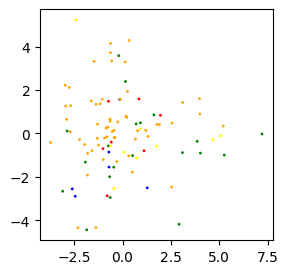

In [72]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# model_df'deki verileri örnekleyerek daha küçük bir DataFrame oluşturur
pca_df = model_df.reset_index()
pca_df = model_df.dropna(axis=0).iloc[:,1:]  # NaN değerleri içeren satırları çıkarır ve ilk sütunu (indeks) atar
pca_df = pca_df.iloc[::50]  # Her 50 satırı bir alarak veriyi örnekler

# PCA (Ana Bileşen Analizi) için ayarları yapar
pca = PCA(n_components=2, random_state=42)  # 2 bileşenli PCA oluşturur
pca = pca.fit_transform(pca_df.iloc[:, :-1])  # PCA'yı veri üzerinde uygular ve dönüşüm yapar
labels = pca_df["label"]  # Etiketleri alır

# Plot bileşenlerini ayarlar
x_axis = pca[:,0]  # PCA'nın ilk bileşenini x eksenine alır
y_axis = pca[:,1]  # PCA'nın ikinci bileşenini y eksenine alır
color_map = pca_df["label"].map({1:"blue",  # Etiketlere göre renk atar
                                 2:"red",
                                 3:"yellow",
                                 4:"green",
                                 5:"orange"})

# PCA sonuçlarını grafikte gösterir
f, axes = plt.subplots(figsize=(3,3))  # Grafik boyutlarını ayarlar
plt.scatter(x_axis, y_axis, color=color_map, s=1)  # Noktaları grafik üzerine çizer
plt.show()  # Grafiği gösterir

# Exploratory Data Analysis #
We'll implement several interesting Natural Language Processing techniques in order to explore our Amazon dataset.

## More on Word2Vec ##
To better appreciate the concept of word embeddings, we take five common words in our corpora and derive their five most related words using our `word_vec` model. The similarity comes from how often these tokens appear in the same window of words as their `word_bank` counterpart.

In [73]:
word_bank = ["nook", "phone", "tv", "good", "price"]

# word_bank içindeki her kelime için en benzer kelimeleri bulur
for word in word_bank[:]:
    # Mevcut kelimenin en benzer 5 kelimesini bulur
    related_vec = word_vec.wv.most_similar(word, topn=5)

    # Benzer kelimeleri numpy dizisine dönüştürür
    related_words = np.array(related_vec)[:,0]

    # Benzer kelimeleri word_bank listesine ekler
    word_bank.extend(related_words)

    # Kelimenin ve benzer kelimelerinin çıktısını verir
    print(f"{word}: {related_words}")


nook: ['noble' 'barnes' 'galaxy' 'needsbrowser' 'nicenot']
phone: ['htc' 'cell' 'latte' 's3' 'galaxy']
tv: ['television' 'tvs' 'plasma' 'vizio' 'playstation']
good: ['great' 'nowadays' 'pretty' 'excellent' 'amazing']
price: ['money' 'categorization' 'buck' 'xbr9' 'z4']


### t-SNE ###
Like PCA, the t-Distributed Stochastic Neighbor Embedding (*t-SNE*) is another dimensionality reduction technique that assists in visualizing high-dimensional datasets. To perceive the similarity between the related words in terms of spatial distance, t-SNE provided the coordinates of each word in a 2D scatterplot plane.

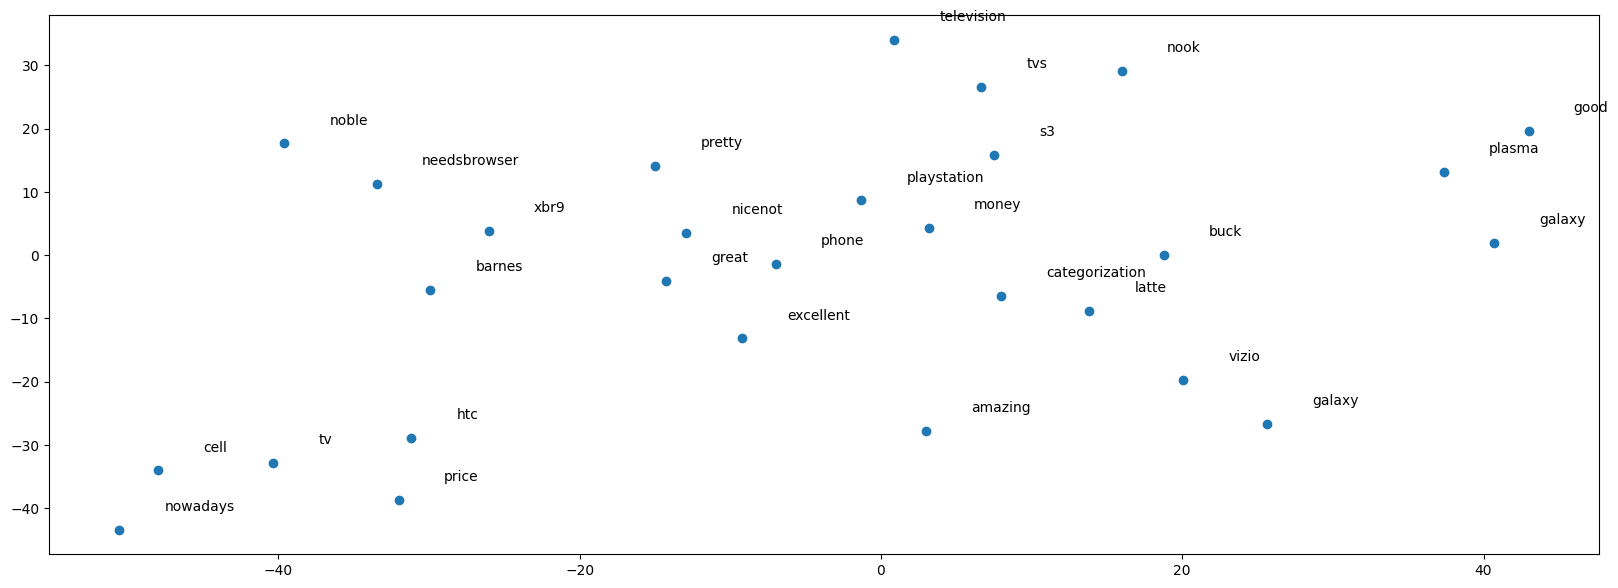

In [74]:
from sklearn.manifold import TSNE

# TSNE'yi 2 bileşenli ve belirli hiperparametrelerle oluşturur
tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

# word_bank'teki kelimelerin vektörlerini alır
sample_vecs = word_vec.wv[set(word_bank)]

# Bu vektörlere TSNE uygular ve 2D koordinatlara dönüştürür
sample_tsne = tsne.fit_transform(sample_vecs)

# TSNE dönüşümünden elde edilen x ve y koordinatlarını ayırır
tsne_x = sample_tsne[:, 0]
tsne_y = sample_tsne[:, 1]

# Grafiği oluşturur ve ayarlarını yapar
f, axes = plt.subplots(figsize=(20,7))  # Grafik boyutlarını ayarlar
ax = plt.scatter(x=tsne_x, y=tsne_y)  # TSNE dönüşüm sonuçlarını noktalar olarak çizer

# Her kelime için koordinatları üzerinde etiketler ekler
for label, x, y in zip(word_bank, tsne_x, tsne_y):
    plt.annotate(label, xy=(x+3, y+3))  # Her kelimenin yanına etiket ekler

plt.show()  # Grafiği gösterir


### Word Algebra ###
Since *Word2Vec* characterizes words into quantified tokens, we can consequently add or subtract word vectors together. To add is to combine the meaning of the components and to subtract is to take out the context of one token from another. The following are examples of this vector algebra and their similarity scores:

**Books + Touchscreen**

In [75]:
# "books" ve "touchscreen" kelimelerinin benzerliğine göre en yakın kelimeyi bulur
# Bu kelimeleri pozitif yönlendirme olarak kullanır ve negatif yönlendirme olarak boş bırakır
similar_word = word_vec.wv.most_similar(positive=["books", "touchscreen"],
                                          negative=[], topn=1)

# Elde edilen en benzer kelimeyi çıktı olarak verir
print(similar_word)


[('touchpad', 0.4989699423313141)]


**Cheap – Quality**

In [76]:
# "cheap" kelimesini pozitif yönde ve "quality" kelimesini negatif yönde kullanarak en benzer kelimeyi bulur
# Bu kelimeler arasındaki ilişkiye göre benzer bir kelime önerir
similar_word = word_vec.wv.most_similar(positive=["cheap"],
                                          negative=["quality"], topn=1)

# Elde edilen en benzer kelimeyi çıktı olarak verir
print(similar_word)


[('sell', 0.4024727940559387)]


**Tablet – Phone**

In [77]:
# "tablet" kelimesini pozitif yönde ve "phone" kelimesini negatif yönde kullanarak en benzer kelimeyi bulur
# Bu kelimeler arasındaki ilişkiye göre en benzer kelimeyi önerir
similar_word = word_vec.wv.most_similar(positive=["tablet"],
                                          negative=["phone"], topn=1)

# Elde edilen en benzer kelimeyi çıktı olarak verir
print(similar_word)

[('tf700', 0.4066457450389862)]


## Named-Entity Recognition ###
We've seen *gensim* perform word tagging to identify part-of-speech. Now we use *spaCy* to go further and identify what nouns in the documents refer to. Some Named-Entity Recognition (*NER*) classification tags include distinguishing persons, organizations, products, places, dates, etc.

In exploring *spaCy*, we'll be using the `most_helpful_text`, which is the highest-rated product review by Amazon users. The `helpful` series from the `df` dataframe is actually a list with its first element storing the number of *helpful* votes a review received, and the second element containing the total number of *helpful* and *not helpful* review votes.

In [78]:
# "helpful" sütunundaki değerleri listeye dönüştürür
helpful = df["helpful"].tolist()

# Liste içindeki en yüksek "helpful" değerini bulur
most_helpful = max(helpful, key=lambda x: x[0])

# "helpful" sütununda en yüksek değeri eşleştiren satırların indekslerini bulur
most_helpful_idx = df["helpful"].astype(str) == str(most_helpful)
most_helpful_idx = df[most_helpful_idx].index

# En yüksek "helpful" değerine sahip yorumun metnini alır
most_helpful_text = df["reviewText"].iloc[most_helpful_idx].values[0]

# En yüksek "helpful" değere sahip yorumun metnini yazdırır
print(most_helpful_text)


I was able to secure the new iPad at our local Apple store, but I also got to spend some time with a review model beforehand. In any case, I'll take you hands-on with the new model, plus I'll share my experience from my past two years of iPad ownership altogether, especially for those who haven't yet had an iPad to call their own. I'll also reveal a treasure trove of info on how you can legitimately download tons of quality apps and games for free, in hopes of making this the most helpful iPad review on Amazon!For those interested, I've also compiled two iPad listmania lists:Must-Have iPad Accessories: http://www.amazon.com/lm/R1M3AJDBR2BCA7?tag=1pad-20&ie;=UTF8iPad vs. Other Tablets: http://www.amazon.com/lm/R3QLZ307253XU6?tag=1pad-20&ie;=UTF8My review tends to run long, so I've organized information by section, with headings, to make it more helpful for those just looking for specific info. For example, see the heading "Downloading Apps and Games" for the info on obtaining free apps 

We use `ner_dict`, a dictionary initialized as a list, to segregate the nouns in the `most_helpful_text` into the NER tags.

In [80]:
%%time
import spacy
from collections import defaultdict

# İngilizce dil modelini yükler
ner = spacy.load("en_core_web_sm")

# En yüksek "helpful" değere sahip yorum metnini NLP modelinden geçirir
ner_helpful = ner(most_helpful_text)

# Tespit edilen varlıkları kategorilere ayırarak saklamak için bir defaultdict oluşturur
ner_dict = defaultdict(list)
for entity in ner_helpful.ents:
    ner_dict[entity.label_].append(entity)

# Her varlık türü ve ona ait isimleri yazdırır
for NER, name in ner_dict.items():
    print(f"{NER}:\n{name}\n")


ORG:
[iPad, Apple, iPad, iPad, iPad, Amazon!For, iPad, AT&T, Apple Digital AV Adapter, Front-facing, VGA, Verizon, AT&T, iPad, iPad, CPU, CPU, iPad, Apple, iPad, iPad Mini, iPad, iPad, Android, iPad, iDevices, Android, Android, iPad, Apple, iPad, Apple, Apple, iPad, First Impression, iPad, iPad, iPad, Android, iPad, iPad, iPad, iPad, iPad, iTunes, YouTube, Apple, iPod, iPad, iBooks, iPad, Apple, iPad, Apple, iPad, iPad, Apple, iBooks, iWork, Apple, apps, PowerPoint, iPad, iWork, iPad, iPad, iPad, iPad, iPad, Apple, Apple, Apple, iPad, iPad, AppShopper, AppShopper, AppSniper, AppAdvice, iPad, iPad, iPad, iPad, iPad, iPad, iPad, iPad, iPad, iPad, iPad, iPad, iPad, iPad, iPad, TextNow, Apple, iPad, Apple, iPad, iPad, Apple, iPad, the iPhone/iPod Touch, Apple, HTML5, iPad, iPad, iPad, iPad, iPad, iPad, Social Networking, iPad, Yahoo, AOL, MobileMe, Microsoft Exchange, IMAP, iPod Touch, iPad, YouTube, iPad, YouTube, iPad, iPad, Netflix, SlingPlayer, iPad, iPad, iPad, iPhoto, Apple, iPad!As,

We use `displaCy` to visualize the tags in the review.

In [81]:
from spacy import displacy

# "ner_helpful" metnindeki adlandırılmış varlıkları görsel olarak gösterir
# 'style="ent"' ile adlandırılmış varlıkların gösterimini sağlar
# jupyter=True parametresi, Jupyter Notebook içinde görselleştirir
displacy.render(ner_helpful, style="ent", jupyter=True)


## Dependency Tree ##
The capability of *spaCy'*s NER is based on deciphering the structure of the sentence by breaking down how tokens interact with and influence each other. Below is the dependency trees of the first three sentences of the `most_helpful_text`.

In [82]:
def ner_displacy(sentence):
    # Verilen cümleyi NLP modelinden geçirir ve adlandırılmış varlıkları tanımlar
    ner_sentence = ner(sentence)

    # Adlandırılmış varlıkları görsel olarak gösterir
    displacy.render(ner_sentence, jupyter=True,
                    options={"compact": False,  # Görselleştirmede varlıkları daha ayrıntılı gösterir
                             "distance": 90,  # Varlıklar arasındaki mesafe
                             "word_spacing": 20,  # Kelimeler arasındaki boşluk
                             "arrow_spacing": 10,  # Okların arasındaki mesafe
                             "arrow_stroke": 2,  # Okların kalınlığı
                             "arrow_width": 5})  # Okların genişliği

# En yüksek "helpful" değere sahip yorumun ilk 3 cümlesini görselleştirir
for sentence in most_helpful_text.split(".")[0:3]:
    ner_displacy(sentence)

## Topic Modeling ##


Because Latent Dirichlet Allocation (*LDA*) can cluster documents together according to topic, the reviews can be classified and grouped according to the type of electronics product they correspond to. The product reviews will have weights assigned to each of the topic and the topics themselves will have weights on every token. As it is a clustering-based model, LDA is unsupervised and only the `num_topics` is configurable.

The following are the top five words that are salient to the first group of product reviews.

In [83]:
%%time
import multiprocessing
from gensim.models.ldamulticore import LdaMulticore

# İşlemci sayısını alır
cores = multiprocessing.cpu_count()

# LDA modelinin ayarlarını yapar
num_topics = 10  # Konu sayısını belirler
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=vocabulary,
                       passes=5, workers=cores, random_state=42)

# İlk konudaki en yüksek frekansta olan 5 terimi ve frekanslarını yazdırır
for token, frequency in bow_lda.show_topic(0, topn=5):
    print(token, frequency)

ipad 0.018955199
one 0.0069928276
time 0.00678346
work 0.006624684
use 0.0066139717
CPU times: user 21 s, sys: 1.55 s, total: 22.5 s
Wall time: 36.6 s


The words that are the most characteristic of the topics are indeed thematic. And each word group do conjure a distinct topic.

In [84]:
# Belirlenen konu sayısı kadar döngü başlatır
for topic in range(0, num_topics):
    print(f"\nTopic {topic+1}:")  # Her konu için başlık yazdırır

    # Belirli bir konudaki en yüksek frekansta olan 5 terimi ve frekanslarını yazdırır
    for token, frequency in bow_lda.show_topic(topic, topn=5):
        print(f" {token}, {frequency}")


Topic 1:
 ipad, 0.018955199047923088
 one, 0.006992827635258436
 time, 0.006783459801226854
 work, 0.006624684203416109
 use, 0.0066139716655015945

Topic 2:
 tv, 0.02358219400048256
 get, 0.014250286854803562
 use, 0.010982846841216087
 go, 0.010835791006684303
 work, 0.010252389125525951

Topic 3:
 drive, 0.017972607165575027
 use, 0.01738857850432396
 mouse, 0.00869082473218441
 work, 0.008507919497787952
 one, 0.007534122560173273

Topic 4:
 use, 0.011209055781364441
 sound, 0.010888628661632538
 get, 0.010275835171341896
 headphone, 0.010057282634079456
 like, 0.009496653452515602

Topic 5:
 use, 0.016491571441292763
 battery, 0.015094743110239506
 work, 0.011839373968541622
 great, 0.010024151764810085
 well, 0.00914960727095604

Topic 6:
 case, 0.01476735807955265
 use, 0.014375405386090279
 router, 0.008647753857076168
 cable, 0.007415470667183399
 one, 0.007371113635599613

Topic 7:
 case, 0.011572633869946003
 use, 0.009603903628885746
 one, 0.008763383142650127
 sound, 0.00

Using *pyLDAvis*, we can interactively explore the words associated with the topics derived by LDA. The Intertopic Distance Map shows how some product reviews in one topic converge with others due to similarity. If needed, we can adjust the `num_topics` accordingly to cluster together topic intersections so a more evident decision boundary between classes can be established.

In [86]:
#!pip install pyLDAvis
import pyLDAvis.gensim

# LDA modelinin görselleştirilmesi için pyLDAvis hazırlanır
lda_idm = pyLDAvis.gensim.prepare(bow_lda, bow, vocabulary)

# Görselleştirilmiş LDA modelini Jupyter Notebook içinde gösterir
pyLDAvis.display(lda_idm)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.5 MB/s eta 0:00:00


# Machine Learning #
We'll further process our finalized dataframe in order to make it compatible and easy to pipe into our Machine Learning model.

## Dealing with NaNs ##
It is important that we impute NaN values before we feed them into a model because machine learning algorithms can only work with *real* numbers. Our dataframe was derived from employing a *Word2Vec* model and so the only way we could have invalid entries that would become NaN values is when we have empty documents.

If a review contains no tokens then every dimension would become NaN. And so to find out the indices of NaN documents, we just have to filter reviews that have a NaN on the first dimension (or any dimension at all).

In [87]:
# model_df DataFrame'indeki herhangi bir NaN (eksik) değere sahip satırların indekslerini alır
nan_list = model_df[model_df[0].isna()].index

# Bu indeksleri bir listeye dönüştürür
nan_list = nan_list.tolist()

# Liste içindeki ilk 50 NaN indeksi yazdırır
print(nan_list[0:50])

[]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Indeed, inspecting these documents brings us empty lists which tell us that there are no tokens in the review.

In [88]:
# nan_list'teki ilk 5 eksik (NaN) değere sahip satırın indekslerini kullanarak,
# tokenized listesindeki bu indekslerin karşılık gelen değerlerini yazdırır
print(*[tokenized[blank] for blank in nan_list[0:5]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Imposing these indices to our `df`, we can extract what these reviews originally looked like before tokenization and before all the pre-processing steps were performed. We see that, other than blanks, reviews that would become NaNs contain only minimal characters. The fourth entry is invalidated because in our steps, we have dropped all characters that are not alphanumeric leaving us with just the letter *A*. We have also chosen in our pre-processing that single-characters would not be tokenized. The fourth review would therefore end up as an empty list after our NLP steps.

In [89]:
# nan_list'teki ilk 5 eksik (NaN) değere sahip satırın indekslerini kullanarak
# df DataFrame'indeki "reviewText" sütunundan bu indekslere karşılık gelen yorum metinlerini görüntüler
for blank in nan_list[0:5]:
    display(df["reviewText"].iloc[blank])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The `model_df` is updated by dropping the NaN documents.

In [90]:
# 'model_df' DataFrame'indeki toplam satır sayısını yazdırır
print(f"Original 'model_df' count: {len(model_df)}")

# NaN (eksik) değer içermeyen satırlarla 'model_df' DataFrame'indeki toplam satır sayısını yazdırır
print(f"Final 'model_df' count: {len(model_df.dropna(axis=0))}")

# Eksik değerleri içermeyen satırlarla yeni 'model_df' DataFrame'ini oluşturur
model_df = model_df.dropna(axis=0)

# Güncellenmiş 'model_df' DataFrame'inin ilk birkaç satırını görüntüler
display(model_df.head())

Original 'model_df' count: 5000
Final 'model_df' count: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.896982,0.518974,0.099752,-0.300781,0.293695,0.026044,0.334398,0.385265,0.188997,-0.687194,...,0.157324,-0.302944,-0.149980,0.143141,-0.102826,0.338851,-0.079937,-0.476457,-0.717904,5
1,0.088005,-0.111623,0.224643,0.325102,0.425250,0.146543,0.293229,0.497250,-0.449727,-0.857121,...,-0.911012,-0.178441,-0.452377,0.538969,-0.881636,-0.653836,-0.582554,0.271822,0.033484,4
2,0.410482,-0.888342,0.402083,0.115854,-0.086077,0.096057,0.820929,-0.050297,0.031039,-0.325332,...,0.579721,-0.295153,0.218925,0.126244,-0.214999,-0.808966,-0.467398,0.153234,-0.422339,4
3,0.217757,0.054956,-0.689575,-0.608244,1.319808,0.723681,0.868908,0.290203,-0.506029,0.377620,...,-0.197432,0.940368,0.052716,-0.333255,-0.150995,-1.846488,-0.088789,-0.192504,0.007674,5
4,-0.845148,1.251838,-1.063151,-0.736713,-1.095883,1.150394,0.541054,0.290480,0.523020,-0.448893,...,-0.634570,0.318430,-0.811455,0.259966,0.124558,-0.120921,0.189905,-0.488453,-0.265166,1


## Dealing with Unbalanced Data ##
The distribution of ratings shows that, in general, users highly approve of products bought on Amazon. This however gives us a highly imbalanced dataset.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


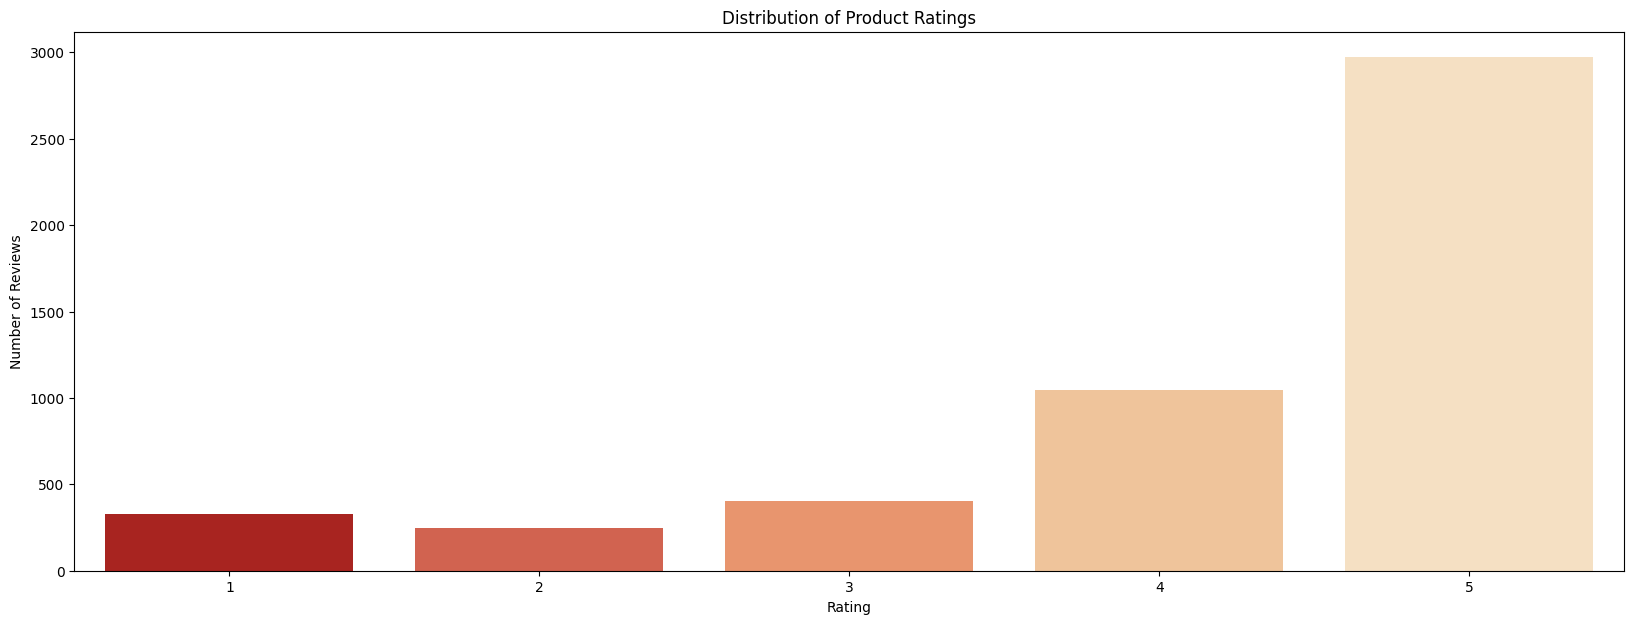

In [91]:
import seaborn as sns

# Grafik boyutlarını ayarlamak için bir subplot oluşturur
f, axes = plt.subplots(figsize=(20,7))

# 'overall' sütunundaki ürün derecelendirmelerinin dağılımını gösteren bir countplot oluşturur
ax = sns.countplot(x=df["overall"], palette="OrRd_r")

# Grafiğin başlığını ve eksen etiketlerini ayarlar
ax.set(title="Distribution of Product Ratings",
       xlabel="Rating", ylabel="Number of Reviews")

# Grafiği gösterir
plt.show()

If the model simply classified every review as `5`, then an accuracy of around 60% can be achieved given this exact dataset. Since this would outperform predictions made by chance, we should therefore ensure that we stratify the testing set where we base the final score of the model.

To deal with this we will have to take into account underrepresenting the majority and/or overrepresenting the minority.

In [92]:
# 'overall' sütununda değeri 5 olan satırları seçer
majority = df["overall"] == 5

# Bu satırların toplam veri setine oranını hesaplar
majority_ratio = len(df[majority]) / len(df)

# Oranı yüzdelik olarak yazdırır
print(f"{majority_ratio*100:.2f}%")

59.42%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Underrepresentation vs. Overrepresentation ##

Performing over-representation is possible by bootstrapping the minority classes to match the size of the majority classes. This can be done using K-Nearest Neighbors (*KNN*) or via Support Vector Machine (*SVM*) by clustering a given class first before generating random samples within the decision boundaries of the class. A popular module called `SMOTE`, or *Synthetic Minority Over-sampling Technique*, does exactly this. However, since the imbalance in our classes is massive, and because we have 100 dimensions for each one of our almost 1.7 million observations, this approach is extremely computationally expensive.

Because our dataset is huge, we can afford to perform sampling in every class and still have a significant amount of data for the model. This way, we can then opt to *underrepresent* the majority class according to our most minority class.

In [93]:
# 'model_df' DataFrame'indeki 'label' sütununda değeri 2 olan satırların sayısını hesaplar
count = len(model_df[model_df["label"] == 2])

# Hesaplanan sayıyı yazdırır
print(f"Size of the most underrepresented class: {count}")

Size of the most underrepresented class: 250


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In choosing this route to deal with imbalance, we create a trimmed version of our dataframe, `trimmed_df`. Each class is trimmed to have the same number of entries as the smallest class which is *Class 2*.

In [94]:
# Çoğunluk sınıfını kesme
condition = model_df["label"] == 5  # 'label' sütunu 5 olan satırları seç
trimmed_df = model_df[condition].sample(n=count, random_state=42)  # Seçilen satırlardan rastgele 'count' kadarını al

# Diğer sınıfları kesip trimmed_df'ye ekleme
for rating in [1, 2, 3, 4]:  # 1'den 4'e kadar olan sınıflar için döngü
    condition = model_df["label"] == rating  # 'label' sütunu rating olan satırları seç
    if len(model_df[condition]) >= count:  # Eğer yeterli sayıda satır varsa
        add_df = model_df[condition].sample(n=count, random_state=42)  # Rastgele 'count' kadarını al
    else:  # Yeterli sayıda satır yoksa
        add_df = model_df[condition]  # Tüm satırları al
    trimmed_df = pd.concat([trimmed_df, add_df], ignore_index=False)  # Eklenen satırlarla birlikte trimmed_df'yi güncelle

# trimmed_df'nin yeni sınıf boyutlarını gösterme
for rating in [1, 2, 3, 4, 5]:  # 1'den 5'e kadar olan sınıflar için döngü
    class_size = len(trimmed_df[trimmed_df["label"] == rating])  # Belirtilen sınıfa ait satır sayısını hesapla
    print(f"Size of Class {rating}: {class_size}")  # Sınıf boyutunu ekrana yazdır

# trimmed_df'yi 'label' sütununa göre sıralama
trimmed_df = trimmed_df.sort_values(by="label")  # 'label' sütununa göre sıralama

# trimmed_df'nin ilk birkaç satırını görüntüleme
display(trimmed_df.head())  # trimmed_df'nin ilk 5 satırını görüntüle

Size of Class 1: 250
Size of Class 2: 250
Size of Class 3: 250
Size of Class 4: 250
Size of Class 5: 250


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
4678,-0.135728,-0.452771,0.255382,-0.487564,0.258925,1.044867,0.120649,0.698073,-0.862293,0.284267,...,-0.489805,-0.108321,-0.532769,-0.022303,-0.843217,-1.242341,0.485931,-1.233260,0.314148,1
58,-0.411097,-0.849881,0.127144,-0.115410,0.074035,0.406603,0.764316,-0.181036,0.133801,0.414234,...,-0.020497,0.032731,-0.231444,0.238253,-0.445996,0.460264,0.440585,-0.121043,0.140596,1
4071,-0.089145,0.569875,-0.164771,0.528147,-0.664835,0.437990,0.495365,0.032550,0.314918,-0.007122,...,-0.198009,-0.541188,-0.289317,0.501499,0.032645,0.133099,0.109043,-0.509075,0.336189,1
851,0.382600,-0.649508,-0.045339,-0.072031,0.496198,0.068496,0.595104,0.015546,-0.150559,0.703092,...,-0.521051,0.322385,-0.402454,0.360619,0.290132,-1.664233,0.086647,0.318454,-0.484866,1
2956,0.283550,-2.092959,1.472555,-1.023392,0.553726,0.999431,1.373407,-0.808303,-0.631240,1.015798,...,0.622378,-0.857348,-0.478903,-0.123320,-0.101601,-0.640161,1.233281,-1.308738,-0.653710,1


The `trimmed_df` is arranged by class from 1 to 5.

In [95]:
# trimmed_df'yi 'label' sütununa göre sıralama
trimmed_df = trimmed_df.sort_values(by="label")  # 'label' sütununa göre sıralama yaparak dataframe'i güncelle

# trimmed_df'nin ilk birkaç satırını görüntüleme
display(trimmed_df.head())  # trimmed_df'nin ilk 5 satırını görüntüle

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
4678,-0.135728,-0.452771,0.255382,-0.487564,0.258925,1.044867,0.120649,0.698073,-0.862293,0.284267,...,-0.489805,-0.108321,-0.532769,-0.022303,-0.843217,-1.242341,0.485931,-1.233260,0.314148,1
1956,0.052596,-0.026576,0.332716,-0.803393,-0.248468,0.794898,1.282402,0.795837,-0.777495,-0.814266,...,-0.575471,-0.120280,0.407114,0.015727,-0.375810,-1.062073,0.282272,0.618914,0.108514,1
3737,0.114737,-0.034467,0.714687,-0.627044,-0.378040,-0.128818,0.700576,0.285243,0.014034,-1.129285,...,-0.049321,-0.191592,-0.008252,-0.297361,-0.332783,-0.693650,0.235194,0.030024,0.101307,1
4283,0.077293,-0.196731,-0.742570,-0.308584,-0.675614,0.980867,0.452094,0.805794,-0.215735,0.285006,...,-0.079324,-0.125756,-0.882598,-0.515112,-0.126473,0.309473,-0.525776,0.420430,0.045819,1
3810,-1.217662,-1.640366,-0.195034,-1.080789,0.510356,0.670855,0.607276,0.511492,0.171688,-0.156484,...,0.069092,-0.476208,0.607890,0.242630,-0.024886,-1.431276,-0.352166,0.328554,-0.697143,1


We see that we now have a perfectly balanced dataset after we performed underrepresentation.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


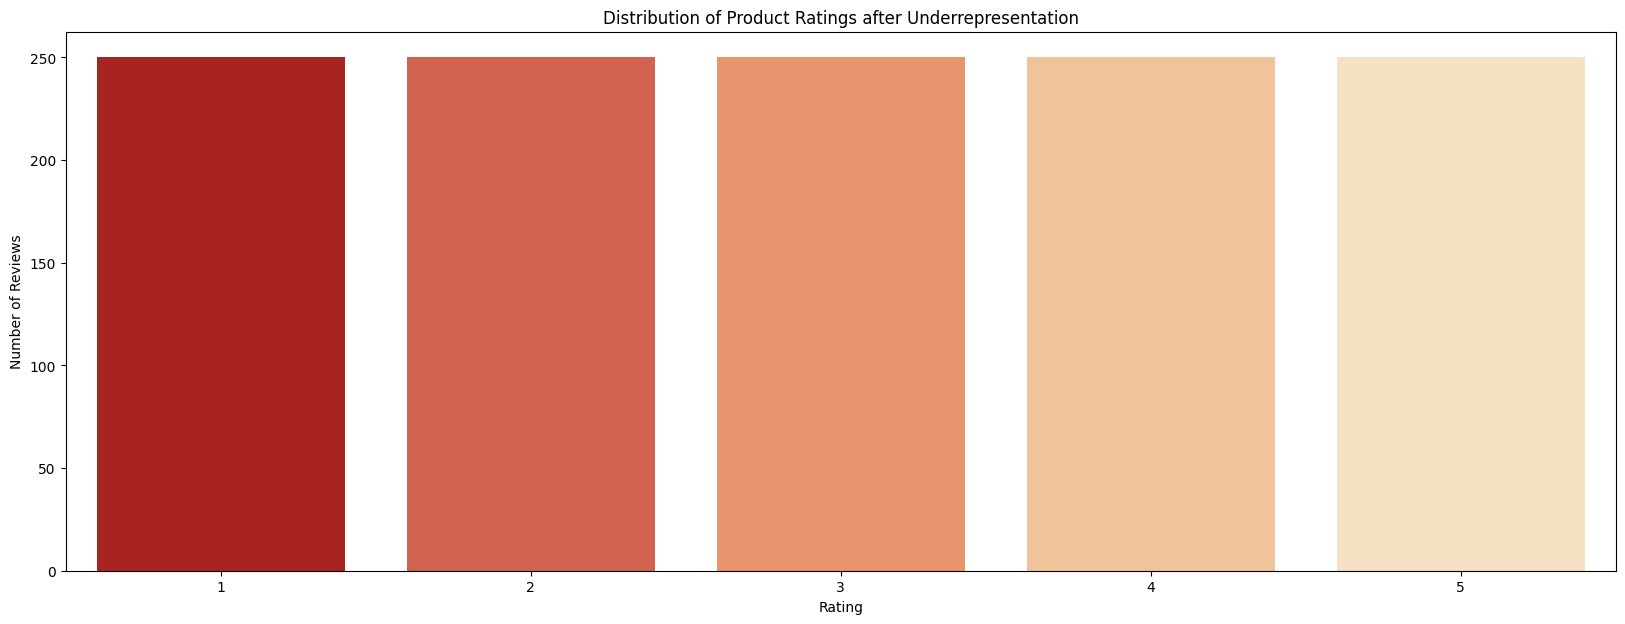

In [96]:
# Grafik oluşturma ve boyutlandırma
f, axes = plt.subplots(figsize=(20, 7))  # 20x7 boyutlarında bir grafik oluştur

# 'label' sütunundaki değerlerin dağılımını sayma ve grafikleştirme
ax = sns.countplot(x=trimmed_df["label"], palette="OrRd_r")  # 'label' sütununa göre sayma grafiği oluştur ve renk paleti belirle

# Grafik başlıkları ve etiketleri ayarlama
ax.set(title="Distribution of Product Ratings after Underrepresentation",  # Grafik başlığını ayarla
       xlabel="Rating",  # X ekseninin etiketini ayarla
       ylabel="Number of Reviews")  # Y ekseninin etiketini ayarla

# Grafiği gösterme
plt.show()  # Grafiği ekranda göster

## Train-Test Split ##
The `y` is our target variable or the labels for the data. The `X` constitutes the features and are the predictor variables.

We evenly split the training and testing sets and *stratify* to ensure the ratio of classes in both sets are identical.

In [97]:
from sklearn.model_selection import train_test_split  # train_test_split fonksiyonunu import et

# Özellikler (X) ve hedef değişkeni (y) ayırma
X = trimmed_df.iloc[:, :-1]  # Son sütun hariç tüm sütunları X olarak al (özellikler)
y = trimmed_df.iloc[:, -1]   # Son sütunu y olarak al (hedef değişkeni)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)
# Veriyi %50 eğitim ve %50 test olarak ayır. Stratify=y, dağılımı korur. random_state=42, tekrar edilebilirliği sağlar

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Scoring and Baseline ##
In our study, we will make use of two metrics to measure the model performance:
* Accuracy
* F1 Score

Accuracy will identify how many reviews are correctly labeled by the model. There are five ratings and thus five classes. No review can have two or more ratings and so the probability that a correct prediction is made from pure guesswork is `20%`.

The F1 score is taking *precision* and *recall* into consideration. Taking into account false positives and false negatives for each class is especially important in inherently imbalanced datasets.

The baseline scores below are for when a model only randomly guesses the output labels – in this case, when every prediction is the same class. The scores are also based on an evenly distributed dataset.

In [98]:
from sklearn import metrics  # sklearn.metrics modülünü import et

# y_test'in şekliyle aynı boyutta bir dizi oluştur
label_shape = np.shape(y_test)  # y_test'in boyutlarını al
y_baseline = np.full(label_shape, 5)  # Tüm elemanları 5 olan bir dizi oluştur

# Baseline (temel) modelin doğruluk ve F1 skorunu hesapla
accuracy_baseline = metrics.accuracy_score(y_test, y_baseline)  # Baseline modelin doğruluğunu hesapla
f1_score_baseline = metrics.f1_score(y_test, y_baseline, average="micro")  # Baseline modelin F1 skorunu hesapla

# Sonuçları ekrana yazdır
print(f"Baseline Accuracy: {accuracy_baseline*100:.3f}%")  # Doğruluk oranını yüzdelik olarak yazdır
print(f"Baseline F1 Score: {f1_score_baseline:.3f}")  # F1 skorunu yazdır

Baseline Accuracy: 20.000%
Baseline F1 Score: 0.200


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Random Forest ##
Random Forest actually has a native way of supporting datasets that have class imbalance. We will therefore be able to use the original `model_df` instead of the sample `trimmed_df`:

In [99]:
from sklearn.model_selection import train_test_split  # train_test_split fonksiyonunu import et

# Özellikler (X) ve hedef değişkeni (y) ayırma
X = model_df.iloc[:, :-1]  # Son sütun hariç tüm sütunları X olarak al (özellikler)
y = model_df.iloc[:, -1]   # Son sütunu y olarak al (hedef değişkeni)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)
# Veriyi %50 eğitim ve %50 test olarak ayır. Stratify=y, dağılımı korur. random_state=42, tekrar edilebilirliği sağlar

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The `class_weight` attribute is provided with a dictionary that represents the associated weight of each class – the majority class is given a *1* and the rest are given the multiplying factor at which they would level with the largest class.

The criteria chosen is `entropy` which is similar to `gini` but instead of splitting nodes until there are pure classes, the nodes are split until the classes within have equal probability.

In [101]:
%%time

from sklearn.ensemble import RandomForestClassifier  # RandomForestClassifier'ı import et

# RandomForestClassifier modelini oluştur
forest = RandomForestClassifier(n_estimators=25,  # Ağaç sayısını 25 olarak ayarla
                                class_weight={1:10, 2:12, 3:7, 4:9, 5:1},  # Sınıflar için ağırlıkları belirle
                                criterion="entropy",  # Bölme kriteri olarak entropiyi seç
                                random_state=42)  # Sonuçların tekrar edilebilirliği için rastgele durum tohumunu belirle

# Modeli eğitim verisi ile eğit
forest.fit(X_train, y_train)  # Modeli X_train ve y_train ile eğit

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 1.71 s, sys: 35.8 ms, total: 1.75 s
Wall time: 1.78 s


RandomForestClassifier(class_weight={1: 10, 2: 12, 3: 7, 4: 9, 5: 1},
                       criterion='entropy', n_estimators=25, random_state=42)

Our tuned Random Forest model got a very high score on the training data. The confusion matrix plotted below highlighted how the model almost perfectly classified each Amazon review accordingly.

However, these scores may be misleading since they are based on the data that the model were trained on. This is highly likely a result of *overfitting*. It is then important to rate our model more effectively without digging into our reserved test set.

In [102]:
y_pred = forest.predict(X_train)  # Eğitim seti üzerinde tahmin yap

# Eğitim setindeki tahminlerin doğruluk ve F1 skorunu hesapla
accuracy = metrics.accuracy_score(y_train, y_pred)  # Doğruluk oranını hesapla
f1_score = metrics.f1_score(y_train, y_pred, average="micro")  # F1 skorunu hesapla

# Sonuçları ekrana yazdır
print(f"Training Set Accuracy: {accuracy*100:.3f}%")  # Eğitim setindeki doğruluk oranını yüzdelik olarak yazdır
print(f"Training Set F1 Score: {f1_score:.3f}")  # Eğitim setindeki F1 skorunu yazdır

Training Set Accuracy: 99.840%
Training Set F1 Score: 0.998


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


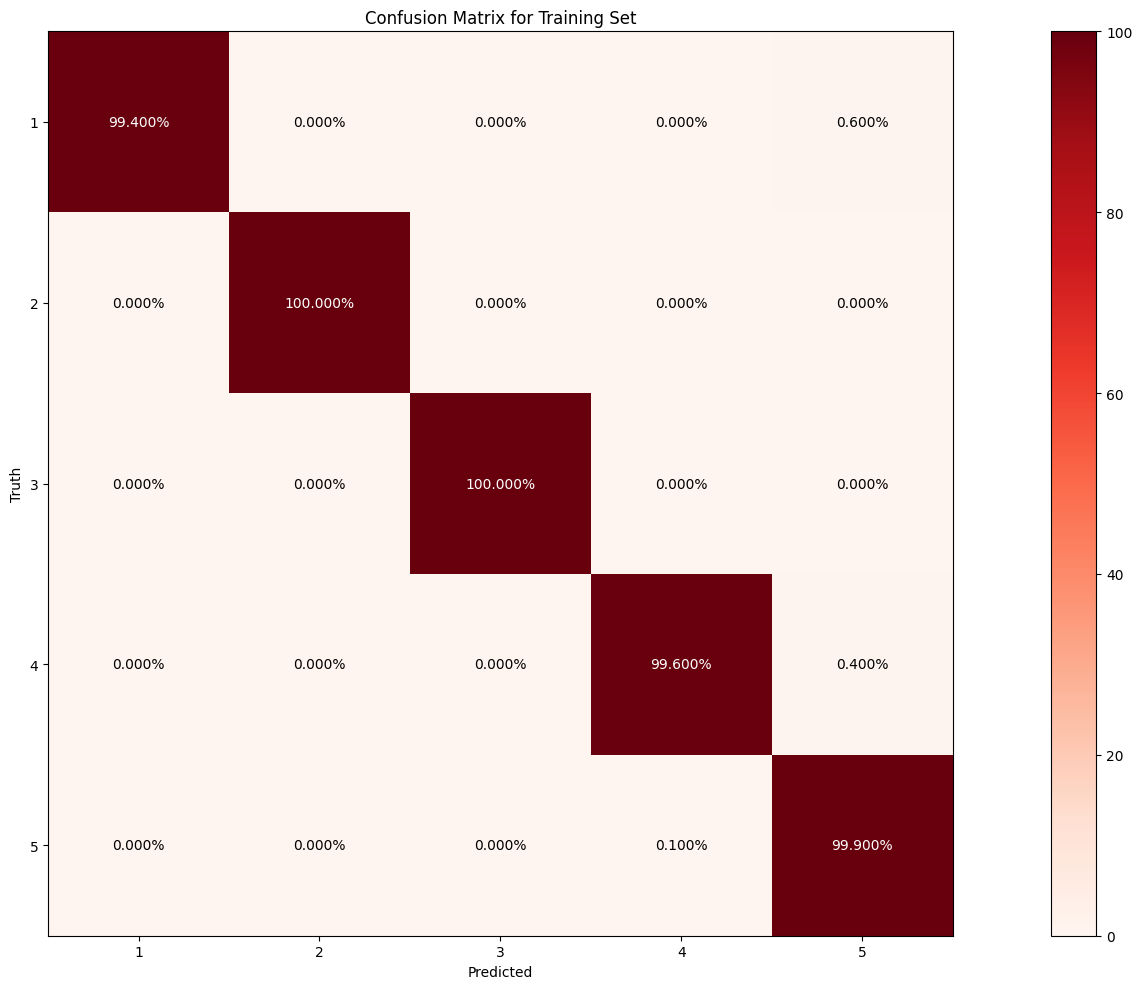

In [103]:
from sklearn.metrics import confusion_matrix  # confusion_matrix fonksiyonunu import et

# Eğitim seti için karışıklık matrisini oluştur
confusion_train = confusion_matrix(y_train, y_pred)  # Gerçek etiketler ile tahminleri karşılaştırarak karışıklık matrisini hesapla

# Karışıklık matrisini normalize et (sütünlara göre toplam 1 olacak şekilde)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]  # Her sınıf için toplamı normalize et

# Yüzdelik olarak yuvarla
confusion_train = np.around(confusion_train, decimals=3) * 100  # Yüzde olarak yuvarla

# Karışıklık matrisinin ısı haritasını oluştur
f, axes = plt.subplots(figsize=(20, 10))  # 20x10 boyutlarında bir grafik oluştur
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)  # Isı haritasını oluştur

# Renkli çubuğu (colorbar) ekle
axes.figure.colorbar(im, ax=axes)  # Isı haritası için renkli çubuğu ekle

# Grafik başlıkları ve etiketleri ayarla
axes.set(title="Confusion Matrix for Training Set",  # Başlığı ayarla
         xticks=np.arange(confusion_train.shape[1]),  # X ekseninde sınıf etiketlerini yerleştir
         yticks=np.arange(confusion_train.shape[0]),  # Y ekseninde sınıf etiketlerini yerleştir
         xticklabels=range(1, 6), yticklabels=range(1, 6),  # Sınıf etiketlerini 1'den 5'e kadar olarak ayarla
         xlabel="Predicted", ylabel="Truth")  # X ve Y eksenlerinin etiketlerini ayarla

# Karışıklık matrisine net açıklamalar ekle
threshold = confusion_train.max() / 1.5  # Renk kontrastı için eşik değer belirle
for i in range(confusion_train.shape[0]):  # Satırları döngüye al
    for j in range(confusion_train.shape[1]):  # Sütunları döngüye al
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",  # Her hücreye yüzde değerini ekle
                ha="center", va="center",  # Metni ortala
                color="white" if confusion_train[i, j] > threshold else "black")  # Renk seçimi için eşik değeri kullan
f.tight_layout()  # Grafik düzenlemesini sıkılaştır
plt.show()  # Grafiği göster

## Cross-Validation ##
Cross-validation makes the most of the training data by splitting the training set into *folds* and further subjecting each fold to train-test splits. Cross-validation can thus test against overfitting and the resulting scores can better reflect how the model performs on data it has not seen before.

In [104]:
from sklearn.model_selection import cross_val_score  # cross_val_score fonksiyonunu import et

# Eğitim setinde çapraz doğrulama ile doğruluk ve F1 skorunu hesapla
cross_val_accuracy = cross_val_score(forest, X_train, y_train,  # Modeli X_train ve y_train ile 3 katlı çapraz doğrulama ile değerlendir
                               cv=3, scoring="accuracy")  # Doğruluk metriğini kullanarak değerlendirme yap
cross_val_f1 = cross_val_score(forest, X_train, y_train,  # Modeli X_train ve y_train ile 3 katlı çapraz doğrulama ile değerlendir
                               cv=3, scoring="f1_micro")  # Mikro ortalama F1 skorunu kullanarak değerlendirme yap

# Çapraz doğrulama sonuçlarının ortalamasını al
cross_val_accuracy = np.mean(cross_val_accuracy)  # Doğruluk skorlarının ortalamasını hesapla
cross_val_f1 = np.mean(cross_val_f1)  # F1 skorlarının ortalamasını hesapla

# Sonuçları ekrana yazdır
print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")  # Eğitim setindeki çapraz doğrulama doğruluk oranını yüzdelik olarak yazdır
print(f"Training Set F1 Score: {cross_val_f1:.3f}")  # Eğitim setindeki çapraz doğrulama F1 skorunu yazdır

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training Set Accuracy: 59.440%
Training Set F1 Score: 0.594


## XGBoost ##

Let's now try to create a model based on a popular boosting technique and see how it compares with our Random Forest model (which is a tree-based bagging approach). XGBoost has become a staple in Kaggle competitions because of its high rate of success and its ease-of-use.

The class notation for our *XGBoost* object `boost` begins from 0, and so we perform an element-wise shift of our labels *from 1 to 0*, *from 2 to 1*, *from 3 to 2*, etc. We tune our model using the maximum number of depths, the learning rate (*eta*), the number of classes, etc. We expect our outputs to be multi-class and so we select `softprob` as our *objective*.

In [106]:
%%time

import xgboost as xgb  # XGBoost kütüphanesini import et

# Hedef değişkenleri 0 tabanlı hale getirmek için kaydır
y_train_shifted = y_train - 1  # Eğitim seti hedef değişkenlerini 0 tabanlı hale getir
y_test_shifted = y_test - 1    # Test seti hedef değişkenlerini 0 tabanlı hale getir

# XGBoost için eğitim ve test veri setlerini oluştur
train_set = xgb.DMatrix(X_train, label=y_train_shifted)  # Eğitim setini XGBoost DMatrix formatına dönüştür
test_set = xgb.DMatrix(X_test, label=y_test_shifted)      # Test setini XGBoost DMatrix formatına dönüştür

# XGBoost hiperparametrelerini ayarla
parameters = {"max_depth": 10,  # Ağaç derinliğini 10 olarak belirle
              "eta": 0.2,        # Öğrenme oranını 0.2 olarak belirle
              "silent": 1,      # Çıktıları sessiz yap
              "objective": "multi:softprob",  # Çok sınıflı sınıflandırma problemi için softprob hedef fonksiyonu kullan
              "num_class": 5}   # Sınıf sayısını 5 olarak belirle

# Modeli eğit
boost = xgb.train(parameters, train_set, 100)  # 100 iterasyon ile XGBoost modelini eğit

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 21.4 s, sys: 114 ms, total: 21.5 s
Wall time: 22 s


The array of predicted labels `y_pred` contains lists of probabilities for each class per product review. The class that is deemed most likely is chosen by the *argmax* and the labels are shifted back to their original state.

The `micro` approach in averaging the F1 score means that the false positives, true positives, and false negatives are taken into account across all classes. This is in contrast with the `macro` approach that instead averages the F1 scores of each class independently.

In [107]:
y_pred = boost.predict(train_set)  # Eğitim seti üzerinde tahmin yap
y_pred = y_pred.argmax(axis=1)  # Tahmin edilen sınıfları seç (softmax çıktısından en yüksek değeri al)
y_pred = y_pred + 1  # 0 tabanlı sınıf etiketlerini 1 tabanlı hale getir

# Eğitim setindeki tahminlerin doğruluk ve F1 skorunu hesapla
accuracy = metrics.accuracy_score(y_train, y_pred)  # Doğruluk oranını hesapla
f1_score = metrics.f1_score(y_train, y_pred, average="micro")  # Mikro ortalama F1 skorunu hesapla

# Sonuçları ekrana yazdır
print(f"Training Set Accuracy: {accuracy*100:.3f}%")  # Eğitim setindeki doğruluk oranını yüzdelik olarak yazdır
print(f"Training Set F1 Score: {f1_score:.3f}")  # Eğitim setindeki F1 skorunu yazdır

Training Set Accuracy: 99.960%
Training Set F1 Score: 1.000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


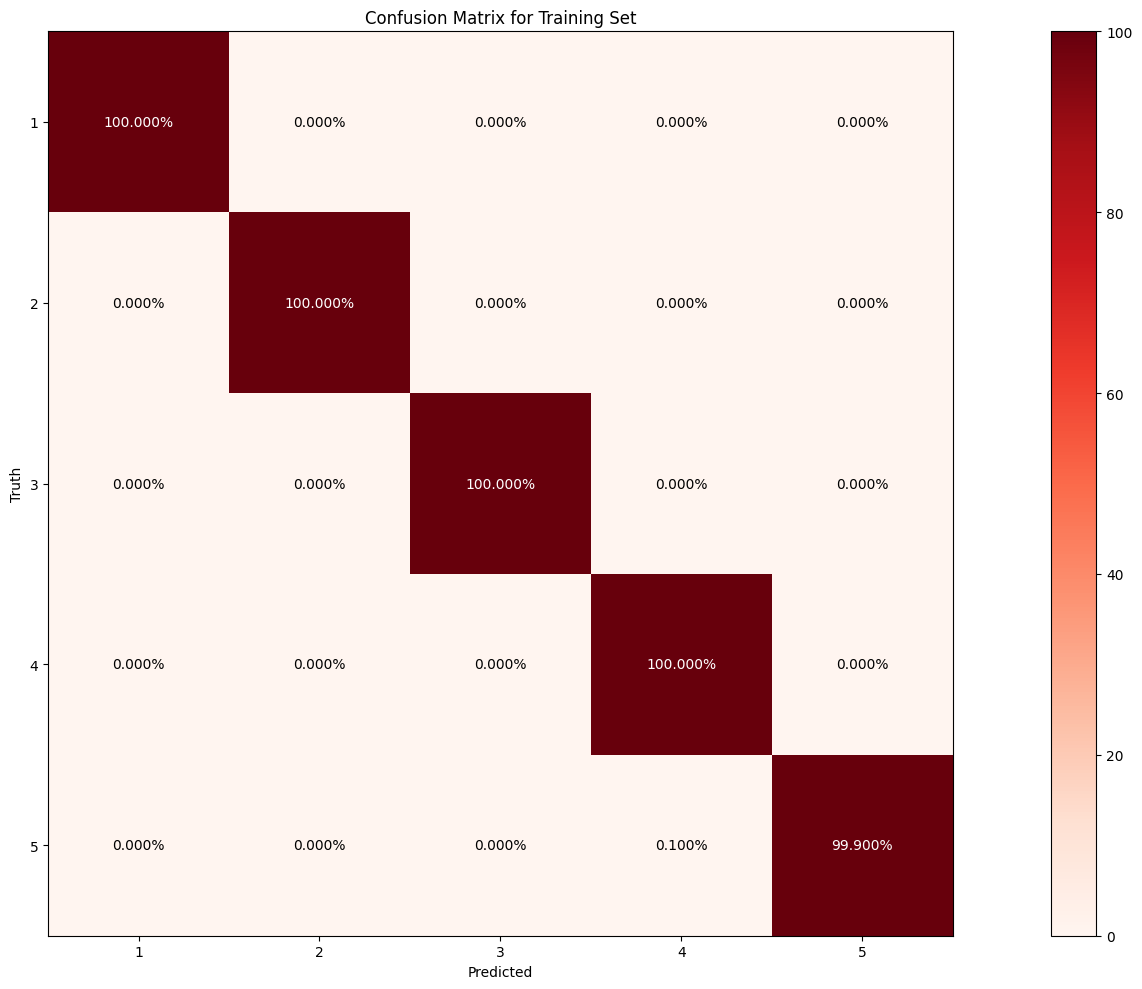

In [108]:
from sklearn.metrics import confusion_matrix  # confusion_matrix fonksiyonunu import et

# Eğitim seti için karışıklık matrisini oluştur
confusion_train = confusion_matrix(y_train, y_pred)  # Gerçek etiketler ile tahminleri karşılaştırarak karışıklık matrisini hesapla

# Karışıklık matrisini normalize et (satırlara göre toplam 1 olacak şekilde)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]  # Her satır için toplamı normalize et

# Yüzdelik olarak yuvarla
confusion_train = np.around(confusion_train, decimals=3) * 100  # Yüzde olarak yuvarla

# Karışıklık matrisinin ısı haritasını oluştur
f, axes = plt.subplots(figsize=(20, 10))  # 20x10 boyutlarında bir grafik oluştur
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)  # Isı haritasını oluştur

# Renkli çubuğu (colorbar) ekle
axes.figure.colorbar(im, ax=axes)  # Isı haritası için renkli çubuğu ekle

# Grafik başlıkları ve etiketleri ayarla
axes.set(title="Confusion Matrix for Training Set",  # Başlığı ayarla
         xticks=np.arange(confusion_train.shape[1]),  # X ekseninde sınıf etiketlerini yerleştir
         yticks=np.arange(confusion_train.shape[0]),  # Y ekseninde sınıf etiketlerini yerleştir
         xticklabels=range(1, 6), yticklabels=range(1, 6),  # Sınıf etiketlerini 1'den 5'e kadar olarak ayarla
         xlabel="Predicted", ylabel="Truth")  # X ve Y eksenlerinin etiketlerini ayarla

# Karışıklık matrisine net açıklamalar ekle
threshold = confusion_train.max() / 1.5  # Renk kontrastı için eşik değer belirle
for i in range(confusion_train.shape[0]):  # Satırları döngüye al
    for j in range(confusion_train.shape[1]):  # Sütunları döngüye al
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",  # Her hücreye yüzde değerini ekle
                ha="center", va="center",  # Metni ortala
                color="white" if confusion_train[i, j] > threshold else "black")  # Renk seçimi için eşik değeri kullan
f.tight_layout()  # Grafik düzenlemesini sıkılaştır
plt.show()  # Grafiği göster

To fairly compare our boosting results with our Random Forest outcome, we perform cross-validation on three folds of the training data set as well.

However, since the XGBoost implementation we used is not supported by *scikit-learn*'s `.fit` method, the cross-validation must be done using `xgboost`'s own API. The output `boost_cv` is actually a *pandas* dataframe that tabulates the results of the cross-validation.

In [110]:
%%time
# Hücre çalışma süresini ölç

import xgboost as xgb  # XGBoost kütüphanesini import et

# XGBoost çapraz doğrulama ile modelin performansını değerlendir
boost_cv = xgb.cv(dtrain=train_set,  # Eğitim veri setini belirt
                  params=parameters,  # Hiperparametreleri kullan
                  nfold=3,  # 3 katlı çapraz doğrulama yap
                  num_boost_round=50,  # 50 iterasyon ile modeli eğit
                  early_stopping_rounds=10,  # Erken durdurma için 10 iterasyonluk sabırsızlık eşiği
                  metrics="merror",  # Hata oranı (merror) metriğini kullan
                  as_pandas=True,  # Sonuçları pandas DataFrame formatında döndür
                  seed=42)  # Tekrar edilebilirlik için rastgele durum tohumunu belirle

# Çapraz doğrulama sonuçlarının ilk birkaç satırını görüntüle
display(boost_cv.head())  # İlk 5 satırı ekranda göster

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.091000,0.002779,0.488000,0.004975
1,0.046000,0.001221,0.455197,0.006146
2,0.024599,0.005156,0.439594,0.011354
3,0.012200,0.001017,0.429200,0.001471
4,0.008200,0.001129,0.423596,0.008610


CPU times: user 34.3 s, sys: 188 ms, total: 34.5 s
Wall time: 35 s


We get the training set cross-validation score by getting the *merror* mean on the 50th `num_boost_round`, which is the final boosting phase. The *merror* is an accuracy error rate metric meant for multi-class labels.

We can get a sense of how accurate the model is by subtracting the *merror* value from a perfect score of 100%.

In [111]:
# Çapraz doğrulama sonuçlarından doğruluk skorunu al
cross_val_accuracy = boost_cv.iloc[-1, 2]  # Son iterasyonun merror (hata oranı) değerini al
cross_val_accuracy = 1 - cross_val_accuracy  # Doğruluğu hesapla (1 - hata oranı)

# Sonucu ekrana yazdır
print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")  # Eğitim setindeki doğruluk oranını yüzdelik olarak yazdır

Training Set Accuracy: 60.000%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Final Scores ##
Seeing that the boosting model outperformed the Random Forest approach in the three-fold cross validation, we can now apply our model on the testing set that we have put aside early on.

In [112]:
# Test seti üzerinde tahmin yap
y_pred = boost.predict(test_set)  # Test seti için tahminler al
y_pred = y_pred.argmax(axis=1)  # Softmax çıktısından en yüksek değeri seç (en olası sınıfı belirle)
y_pred = y_pred + 1  # 0 tabanlı sınıf etiketlerini 1 tabanlı hale getir

# Test setindeki tahminlerin doğruluk ve F1 skorunu hesapla
accuracy = metrics.accuracy_score(y_test, y_pred)  # Doğruluk oranını hesapla
f1_score = metrics.f1_score(y_test, y_pred, average="micro")  # Mikro ortalama F1 skorunu hesapla

# Sonuçları ekrana yazdır
print(f"Test Set Accuracy: {accuracy*100:.3f}%")  # Test setindeki doğruluk oranını yüzdelik olarak yazdır
print(f"Test Set F1 Score: {f1_score:.3f}")  # Test setindeki F1 skorunu yazdır

Test Set Accuracy: 61.440%
Test Set F1 Score: 0.614


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


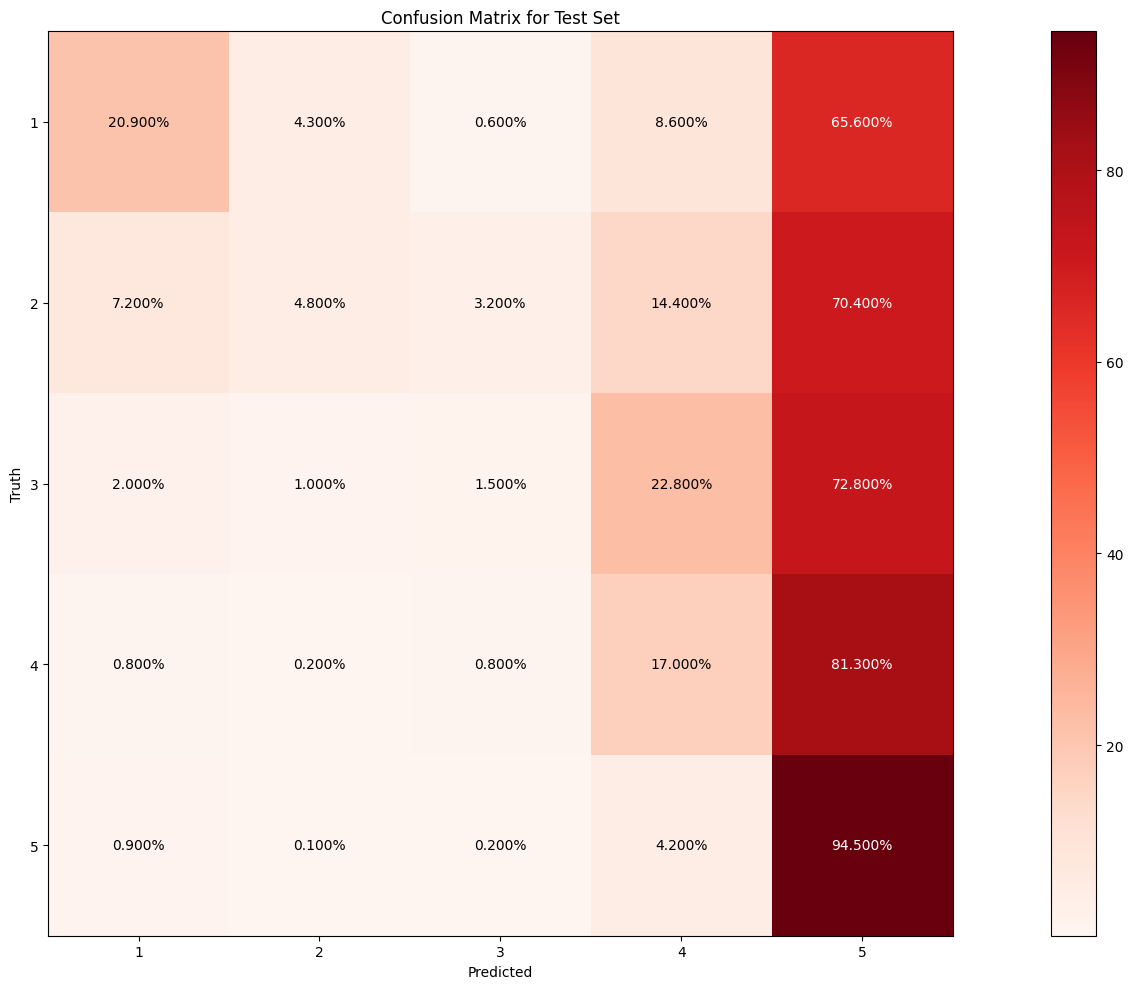

In [113]:
from sklearn.metrics import confusion_matrix  # confusion_matrix fonksiyonunu import et

# Test seti için karışıklık matrisini oluştur
confusion_train = confusion_matrix(y_test, y_pred)  # Gerçek etiketler ile tahminleri karşılaştırarak karışıklık matrisini hesapla

# Karışıklık matrisini normalize et (satırlara göre toplam 1 olacak şekilde)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]  # Her satır için toplamı normalize et

# Yüzdelik olarak yuvarla
confusion_train = np.around(confusion_train, decimals=3) * 100  # Yüzde olarak yuvarla

# Karışıklık matrisinin ısı haritasını oluştur
f, axes = plt.subplots(figsize=(20, 10))  # 20x10 boyutlarında bir grafik oluştur
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)  # Isı haritasını oluştur

# Renkli çubuğu (colorbar) ekle
axes.figure.colorbar(im, ax=axes)  # Isı haritası için renkli çubuğu ekle

# Grafik başlıkları ve etiketleri ayarla
axes.set(title="Confusion Matrix for Test Set",  # Başlığı ayarla
         xticks=np.arange(confusion_train.shape[1]),  # X ekseninde sınıf etiketlerini yerleştir
         yticks=np.arange(confusion_train.shape[0]),  # Y ekseninde sınıf etiketlerini yerleştir
         xticklabels=range(1, 6), yticklabels=range(1, 6),  # Sınıf etiketlerini 1'den 5'e kadar olarak ayarla
         xlabel="Predicted", ylabel="Truth")  # X ve Y eksenlerinin etiketlerini ayarla

# Karışıklık matrisine net açıklamalar ekle
threshold = confusion_train.max() / 1.5  # Renk kontrastı için eşik değer belirle
for i in range(confusion_train.shape[0]):  # Satırları döngüye al
    for j in range(confusion_train.shape[1]):  # Sütunları döngüye al
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",  # Her hücreye yüzde değerini ekle
                ha="center", va="center",  # Metni ortala
                color="white" if confusion_train[i, j] > threshold else "black")  # Renk seçimi için eşik değeri kullan
f.tight_layout()  # Grafik düzenlemesini sıkılaştır
plt.show()  # Grafiği göster

Our results above were actually based on the original `model_df` dataset that had the massive class imbalance. Let's now reassign our `X` and `y` variables to the balanced `trimmed_df` sample dataset we've created.

In [114]:
from sklearn.model_selection import train_test_split  # train_test_split fonksiyonunu import et

# Özellikler (X) ve etiketler (y) ayrımı
X = trimmed_df.iloc[:, :-1]  # Son sütun hariç tüm sütunları özellikler (X) olarak al
y = trimmed_df.iloc[:, -1]   # Son sütunu etiketler (y) olarak al

# Eğitim ve test setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y,  # Özellikler ve etiketleri ayır
                                                     stratify=y,  # Dağılımı koruyarak ayır
                                                     test_size=0.5,  # Test seti oranını %50 olarak belirle
                                                     random_state=42)  # Sonuçların tekrar edilebilirliği için rastgele durum tohumunu belirle

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
# Etiketleri 0 tabanlı hale getir
y_train_shifted = y_train - 1  # Eğitim setindeki etiketleri 0 tabanlı hale getir
y_test_shifted = y_test - 1    # Test setindeki etiketleri 0 tabanlı hale getir

# XGBoost için DMatrix formatına dönüştür
train_set = xgb.DMatrix(X_train, label=y_train_shifted)  # Eğitim setini XGBoost DMatrix formatına dönüştür
test_set = xgb.DMatrix(X_test, label=y_test_shifted)      # Test setini XGBoost DMatrix formatına dönüştür

# Test seti üzerinde tahmin yap
y_pred = boost.predict(test_set)  # Test seti üzerinde tahmin yap
y_pred = y_pred.argmax(axis=1)    # Tahmin edilen sınıfları seç (softmax çıktısından en yüksek değeri al)
y_pred = y_pred + 1              # 0 tabanlı sınıf etiketlerini 1 tabanlı hale getir

# Test setindeki tahminlerin doğruluk ve F1 skorunu hesapla
accuracy = metrics.accuracy_score(y_test, y_pred)  # Doğruluk oranını hesapla
f1_score = metrics.f1_score(y_test, y_pred, average="micro")  # Mikro ortalama F1 skorunu hesapla

# Sonuçları ekrana yazdır
print(f"Balanced Test Set Accuracy: {accuracy*100:.3f}%")  # Test setindeki doğruluk oranını yüzdelik olarak yazdır
print(f"Balanced Test Set F1 Score: {f1_score:.3f}")  # Test setindeki F1 skorunu yazdır

Balanced Test Set Accuracy: 66.560%
Balanced Test Set F1 Score: 0.666


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


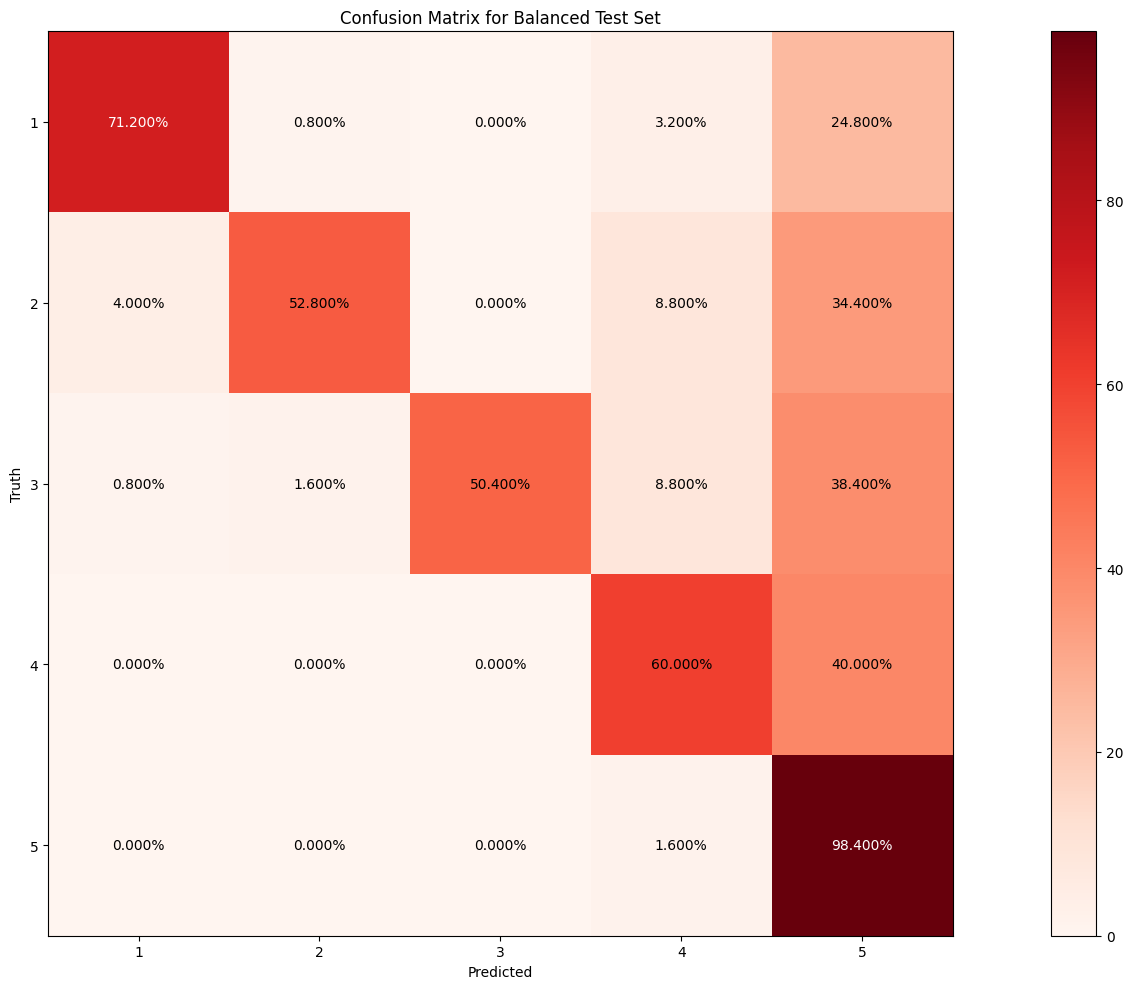

In [116]:
from sklearn.metrics import confusion_matrix  # confusion_matrix fonksiyonunu import et

# Test seti için karışıklık matrisini oluştur
confusion_train = confusion_matrix(y_test, y_pred)  # Gerçek etiketler ile tahminleri karşılaştırarak karışıklık matrisini hesapla

# Karışıklık matrisini normalize et (satırlara göre toplam 1 olacak şekilde)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]  # Her satır için toplamı normalize et

# Yüzdelik olarak yuvarla
confusion_train = np.around(confusion_train, decimals=3) * 100  # Yüzde olarak yuvarla

# Karışıklık matrisinin ısı haritasını oluştur
f, axes = plt.subplots(figsize=(20, 10))  # 20x10 boyutlarında bir grafik oluştur
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)  # Isı haritasını oluştur

# Renkli çubuğu (colorbar) ekle
axes.figure.colorbar(im, ax=axes)  # Isı haritası için renkli çubuğu ekle

# Grafik başlıkları ve etiketleri ayarla
axes.set(title="Confusion Matrix for Balanced Test Set",  # Başlığı ayarla
         xticks=np.arange(confusion_train.shape[1]),  # X ekseninde sınıf etiketlerini yerleştir
         yticks=np.arange(confusion_train.shape[0]),  # Y ekseninde sınıf etiketlerini yerleştir
         xticklabels=range(1, 6), yticklabels=range(1, 6),  # Sınıf etiketlerini 1'den 5'e kadar olarak ayarla
         xlabel="Predicted", ylabel="Truth")  # X ve Y eksenlerinin etiketlerini ayarla

# Karışıklık matrisine net açıklamalar ekle
threshold = confusion_train.max() / 1.5  # Renk kontrastı için eşik değer belirle
for i in range(confusion_train.shape[0]):  # Satırları döngüye al
    for j in range(confusion_train.shape[1]):  # Sütunları döngüye al
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",  # Her hücreye yüzde değerini ekle
                ha="center", va="center",  # Metni ortala
                color="white" if confusion_train[i, j] > threshold else "black")  # Renk seçimi için eşik değeri kullan
f.tight_layout()  # Grafik düzenlemesini sıkılaştır
plt.show()  # Grafiği göster

At 53.3% on a perfectly balanced training data set, we have achieved a better result compared to the 20% accuracy of our baseline.

## Word Cloud ##
Using the true labels of the reviews, we can take the fifty most salient words in every rating and produce a word cloud. The same `stop_words` we derived from the NLTK library are excluded.

We see that some of the words are quite descriptive of the rating, with "problem" and "issue" frequently appearing in one-star reviews, and "quality" and "highly recommend" in top reviews.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


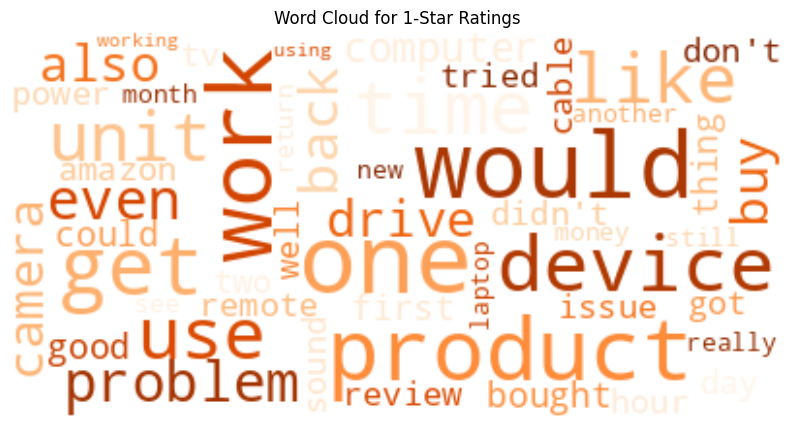

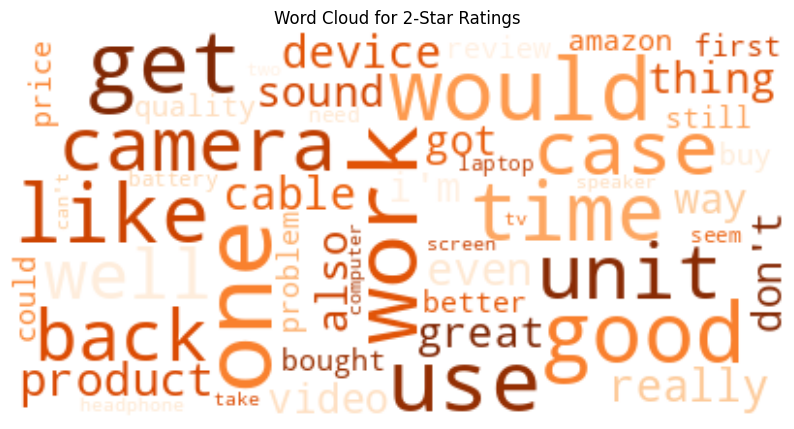

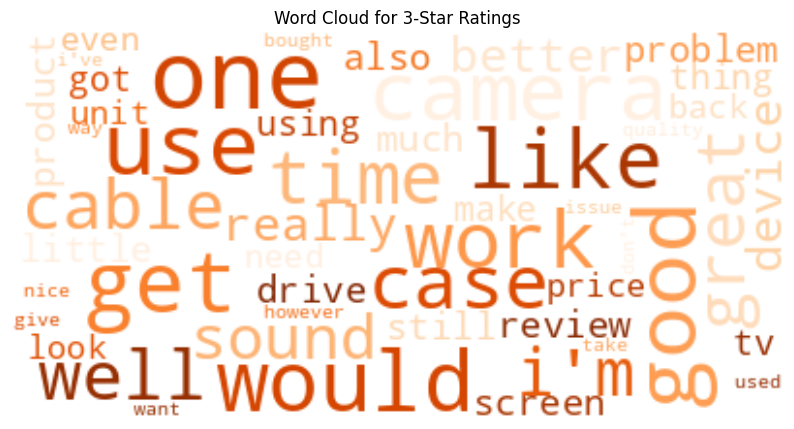

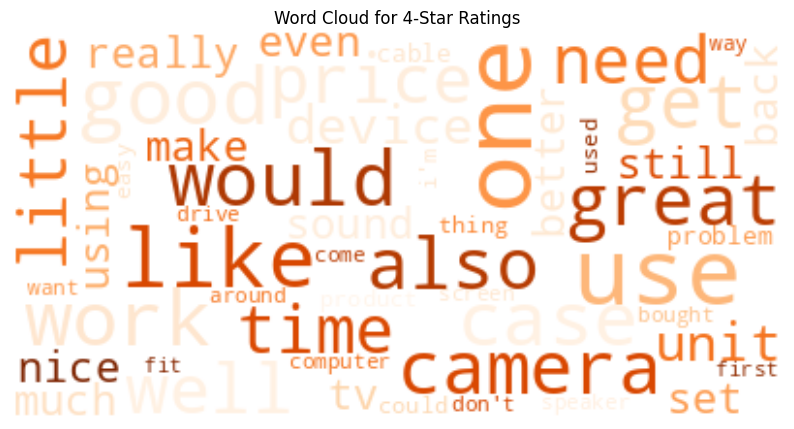

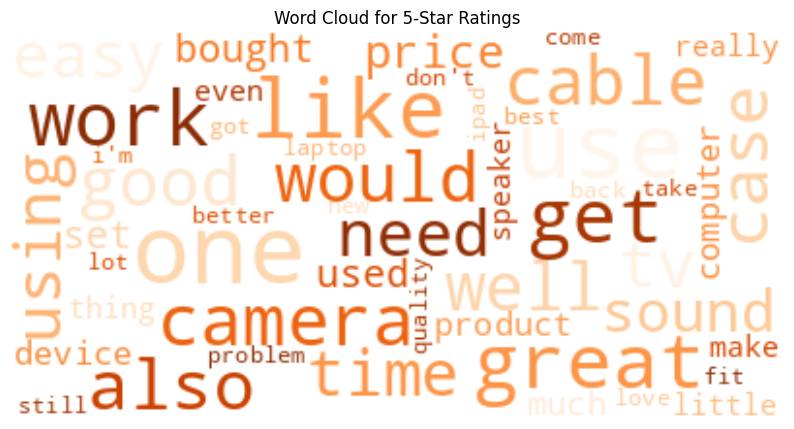

In [117]:
from wordcloud import WordCloud  # WordCloud kütüphanesini import et

# WordCloud nesnesini oluştur
wordcloud = WordCloud(stopwords=set(stop_words),  # Durma kelimelerini belirle
                      min_font_size=10,  # Minimum yazı boyutu
                      max_font_size=50,  # Maksimum yazı boyutu
                      max_words=50,  # Görüntülenecek maksimum kelime sayısı
                      background_color="white",  # Arka plan rengi
                      colormap="Oranges")  # Renk paleti

# Her yıldız derecesi için tüm inceleme metinlerini birleştir ve küçük harfe çevir
one_star_text = " ".join(df[df["overall"] == 1]["reviewText"].values).lower()  # 1 yıldız için incelemeleri birleştir
two_star_text = " ".join(df[df["overall"] == 2]["reviewText"].values).lower()  # 2 yıldız için incelemeleri birleştir
three_star_text = " ".join(df[df["overall"] == 3]["reviewText"].values).lower()  # 3 yıldız için incelemeleri birleştir
four_star_text = " ".join(df[df["overall"] == 4]["reviewText"].values).lower()  # 4 yıldız için incelemeleri birleştir
five_star_text = " ".join(df[df["overall"] == 5]["reviewText"].values).lower()  # 5 yıldız için incelemeleri birleştir

# Metinleri bir listeye koy
text_list = [one_star_text, two_star_text, three_star_text,  # Her yıldız için metinleri listeye ekle
             four_star_text, five_star_text]

# Her bir yıldız derecesi için kelime bulutunu oluştur ve göster
for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10, 7))  # Grafik boyutunu belirle
    wordcloud.generate(text)  # Verilen metin için kelime bulutunu oluştur
    plt.imshow(wordcloud, interpolation="bilinear")  # Kelime bulutunu görüntüle
    plt.title(f"Word Cloud for {index+1}-Star Ratings")  # Başlığı ayarla
    plt.axis("off")  # Eksenleri kapat
    plt.show()  # Grafiği göster

# Conclusion #
A lot of Natural Language Processing techniques were covered in the study. Just some of the concepts explored include topic modeling – where similar texts were clustered together according to topic, named entity recognition (NER) – where nouns were given identifying labels like *place* or *time*, and dependency trees – where parts-of-speech tags and sentence structure were discerned. Though the *Word2Vec* phase was central to our final model, the pre-processing steps were perhaps just as crucial. Prior to tokenization, each document had to be decoded from UTF and encoded to ASCII, and converted to lowercase. The texts were stripped of accents, stop words and punctuation, and multiple whitespaces were dropped. Words were simplified to their root words in order to compact the vocabulary as much as possible. Tokens that were often used together were also singularized through phrase modeling.

Beyond word use and word frequency, our model actually extracts and quantifies *context*. Every token in all the reviews are understood by their neighboring words and embedded in a given number of dimensions. All the interactions of a word with all the other words it has been associated with are expressed in vectors. And all the words in a given review are averaged according to each of the dimensions to create its 100 features. So the essence of a review by its words make up the final dataframe.

What we have is a multi-class model where each of the five classes correspond to a review’s star rating. This is then a discrete approach where each class is independent of each other. In a situation where a 5-star rating is misinterpreted by the model as a 1-star review, then the model has simply misclassified – it is agnostic to how far off `1` and `5` are. This is in contrast with a *continuous* approach whereas a misclassification of a 5-star review as a 1-star review would be more penalizing. Our model then is reliant on the distinction of each kind of review. It is more concerned in asking "*What makes a 5-star review different from a 4-star review?*" than asking "*Is this review more approving than criticizing?*"

## Limitations and Recommendations ##
Though we have observed satisfactory results in our model compared to the baseline, there are several limitations in the way the model handles data. These could serve as areas of improvement. First, despite a rich vocabulary, the model will not be able to handle words that it has not encountered during training. In fact, if an unknown word appears in a review, the word is dropped from the dimension-averaging step since has not  been referenced in our `word_vec_df`.

Because each word is simplified by lemmatization during pre-processing, then alternate forms of a token shouldn’t necessarily be a concern. However, the model cannot identify if a word is misspelled and will identify one simply as a new word. Incorporating a spellchecker would add to the computational cost and will certainly add to the model’s complexity.

Finally, as is usually the case in NLP, sarcasm or text that is intended to be ironic is interpreted by what is literally in the text and not by its underlying context. Because sarcasm is usually detected by readers through the mood and sentiment of the document, it takes adding another layer of NLP just to approximate whether the review is sarcastic or not in order to properly work with such text. This supplement layer will not only utilize tagged sarcastic text as supervised labels, but must also consider the review’s given product rating in its judgment to detect sarcasm.